In [1]:
import os
import cv2

import os
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imsave
from imageio import imwrite
from numpy.random import randint
from keras.models import load_model,save_model

from matplotlib.patches import Rectangle

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Creation

### Helper Function

In [2]:
def getCircleCoord(topx,topy,bottomx,bottomy):
    """
    Generates a random circle within a block given the coordinates of the block.
    
    The block is defined by two points, top-left and bottom-right
    
    Returns the centre coordinate, radius of the circle as well as the top-left corner coordinate of the bounding box for the cirle  
    """
    
    #Randomly select the top-left corner of the bounding box for a cirle 
    x,y = randint(topx,bottomx-4), randint(topy,bottomy-4)
    
    m = max(x,y)
    
    #Width is radius times 2
    width = bottomx - topx
    
    radius = int(randint(2,max(3,(width-m)/2.0)))
    center = (x+radius,y+radius)
  

    return(center,radius,(x,y))
    
    
    

In [3]:
def getBlockCoord(topx,topy,bottomx,bottomy):
    """
    Similar to getBlockCoord, but instead of a circle creates a block (rect) 
    """
    
    x,y = randint(topx,bottomx-4), randint(topy,bottomy-4)
    
    width = randint(1,bottomx-x-1)
    height = randint(1,bottomy-y-1)
    
    return(x,y,width,height)
    

In [4]:
def createImage(img_size, numObjects = 2,cornerCoords = [[0,0,12,25],[12,0,25,25]]):
    

    img = np.ones(img_size)
    img[:,:,:]=1
    
    
    class1 = randint(2)
    class2 = randint(2)
    
    # class 0 represents block and 1 represents circle
    truth = []
    
    for i in range(numObjects):
        
        obj_class = randint(2)
        
        class_truth = [0]*numObjects
        class_truth[obj_class] = 1
        
        bb_truth = [0]*4
        
        if obj_class == 0:
            
            block = getBlockCoord(cornerCoords[i][0] , cornerCoords[i][1], cornerCoords[i][2], cornerCoords[i][3])
          
            
            cv2.rectangle(img, (block[0],block[1]) ,  (block[0] + block[2], block[1] + block[3]) , (0,0,0), -1 )
            
            truth += [block[0] - cornerCoords[i][0],block[1] - cornerCoords[i][1],block[2], block[3]] + class_truth
            
        else:
            
            circ = getCircleCoord(cornerCoords[i][0] , cornerCoords[i][1], cornerCoords[i][2], cornerCoords[i][3])
          
            cv2.circle(img,circ[0],circ[1],(0,0,0),-1)
            
            truth += [circ[2][0] - cornerCoords[i][0],circ[2][1] - cornerCoords[i][1],circ[1]*2,circ[1]*2] + class_truth
        
    print(truth)
    return(img,truth)

        
    
    

In [5]:
def getLabelList(num_classes=2,bounding_boxes=2):
    """
    Creates the header file for the truth label csv
    """
    
    num_classes = 2
    bounding_boxes = 2

    labelList = []

    for i in range(bounding_boxes):

        labelList.append('x'+str(i))
        labelList.append('y'+str(i))
        labelList.append('width'+str(i))
        labelList.append('height'+str(i))

        for j in range(num_classes):
            labelList.append('class'+str(i)+"_"+str(j))
            
    return(labelList)

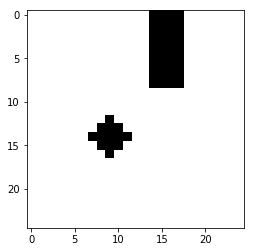

In [4]:
# """
# Here for an image size of 25x25, we are splitting the image into 2 vertical regions by splitting the 
# overall image by half in the x axis
# """

# img_size = (25,25,3)

# img = np.ones(img_size)
# img[:,:,:]=1

# #Obtaining and plotting the two circles
# circ1 = getCircleCoord(0,0,12,25)
# block1 = getBlockCoord(12,0,25,25)

# cv2.circle(img,circ1[0],circ1[1],(0,0,0),-1)
# cv2.rectangle(img, (block1[0],block1[1]) ,  (block1[0] + block1[2], block1[1] + block1[3]) , (0,0,0), -1  )


# #putting a bounding box around the first circle
# # cv2.rectangle(img,circ1[2],(circ1[2][0]+2*circ1[1],circ1[2][1]+2*circ1[1]),(0,100,0),1)


# # print(circ1[0])




# plt.imshow(img)




In [14]:
# x,y = createImage((25,25,3))


# plt.imshow(x)

### Actual Run

In [6]:
#Creating data and truth label

num_classes = 2
bounding_boxes = 2

labelList = getLabelList(num_classes,bounding_boxes)
labelList = ['key'] + labelList

img_size=(25,25,3)
size='25x25'

os.chdir('./'+size+'/')

numImg=8000
dataList = []



for i in range(numImg):
    key = i
    
    img,x = createImage(img_size)

    imwrite(str(key)+'.png',img)
    
    dataList.append([key]+x)
    

data = pd.DataFrame(dataList,columns=labelList)
    

data.to_csv(size+'_truth.csv',index=False,index_label=False)




[0, 5, 4, 4, 0, 1, 8, 7, 1, 7, 1, 0]
[1, 17, 5, 2, 1, 0, 4, 4, 4, 19, 1, 0]
[7, 15, 2, 1, 1, 0, 7, 9, 4, 4, 0, 1]
[2, 20, 6, 2, 1, 0, 3, 6, 8, 2, 1, 0]
[2, 15, 6, 1, 1, 0, 1, 14, 6, 3, 1, 0]
[1, 13, 4, 4, 0, 1, 7, 17, 4, 4, 0, 1]
[5, 1, 4, 4, 0, 1, 8, 19, 4, 4, 0, 1]
[3, 11, 3, 7, 1, 0, 5, 2, 4, 3, 1, 0]
[6, 0, 3, 2, 1, 0, 8, 17, 2, 3, 1, 0]
[2, 13, 4, 4, 1, 0, 2, 12, 4, 4, 0, 1]
[7, 6, 4, 4, 0, 1, 0, 7, 4, 4, 0, 1]
[6, 4, 3, 9, 1, 0, 2, 7, 4, 2, 1, 0]
[4, 8, 4, 4, 0, 1, 8, 3, 4, 4, 0, 1]
[1, 0, 4, 21, 1, 0, 0, 16, 4, 4, 0, 1]
[7, 9, 3, 1, 1, 0, 1, 11, 5, 12, 1, 0]
[6, 10, 3, 6, 1, 0, 2, 19, 4, 4, 0, 1]
[5, 5, 4, 4, 0, 1, 5, 6, 3, 11, 1, 0]
[1, 1, 8, 8, 0, 1, 2, 17, 9, 3, 1, 0]
[4, 10, 4, 4, 0, 1, 7, 10, 2, 4, 1, 0]
[1, 14, 8, 9, 1, 0, 8, 10, 1, 12, 1, 0]
[3, 3, 6, 6, 0, 1, 0, 6, 7, 14, 1, 0]
[6, 2, 4, 4, 0, 1, 8, 20, 1, 3, 1, 0]
[4, 18, 2, 3, 1, 0, 1, 10, 4, 4, 0, 1]
[6, 2, 2, 5, 1, 0, 5, 4, 4, 5, 1, 0]
[0, 5, 4, 4, 0, 1, 8, 11, 4, 4, 0, 1]
[7, 18, 4, 4, 0, 1, 2, 9, 4, 4, 0, 1]
[0, 8,

[6, 0, 4, 4, 0, 1, 5, 8, 4, 4, 0, 1]
[6, 2, 3, 16, 1, 0, 1, 16, 4, 4, 0, 1]
[0, 12, 4, 4, 0, 1, 0, 18, 9, 5, 1, 0]
[4, 12, 3, 11, 1, 0, 7, 20, 4, 4, 0, 1]
[4, 1, 2, 11, 1, 0, 5, 3, 5, 9, 1, 0]
[6, 9, 2, 9, 1, 0, 4, 20, 4, 4, 0, 1]
[2, 20, 6, 2, 1, 0, 7, 20, 4, 4, 0, 1]
[5, 18, 1, 1, 1, 0, 7, 16, 4, 4, 0, 1]
[5, 1, 4, 10, 1, 0, 7, 11, 2, 1, 1, 0]
[0, 3, 6, 6, 0, 1, 3, 10, 4, 4, 0, 1]
[7, 16, 4, 4, 0, 1, 1, 8, 5, 15, 1, 0]
[4, 2, 4, 4, 0, 1, 6, 14, 4, 4, 0, 1]
[0, 16, 10, 6, 1, 0, 1, 15, 7, 7, 1, 0]
[6, 11, 4, 4, 0, 1, 7, 11, 4, 1, 1, 0]
[4, 14, 4, 4, 0, 1, 6, 15, 4, 4, 0, 1]
[4, 5, 4, 4, 0, 1, 0, 10, 6, 4, 1, 0]
[7, 17, 1, 2, 1, 0, 3, 18, 3, 4, 1, 0]
[3, 3, 3, 10, 1, 0, 2, 0, 2, 18, 1, 0]
[2, 13, 4, 4, 0, 1, 0, 5, 3, 11, 1, 0]
[2, 13, 4, 4, 0, 1, 6, 8, 4, 4, 0, 1]
[2, 6, 4, 4, 0, 1, 1, 16, 4, 4, 0, 1]
[5, 5, 5, 16, 1, 0, 4, 11, 6, 6, 1, 0]
[5, 17, 4, 4, 0, 1, 0, 13, 7, 1, 1, 0]
[5, 0, 4, 4, 0, 1, 0, 17, 3, 3, 1, 0]
[4, 18, 4, 4, 0, 1, 4, 11, 4, 10, 1, 0]
[1, 8, 4, 4, 0, 1, 5, 15, 4, 4, 

[5, 2, 3, 10, 1, 0, 2, 20, 8, 3, 1, 0]
[7, 14, 2, 4, 1, 0, 5, 7, 6, 15, 1, 0]
[3, 13, 5, 9, 1, 0, 8, 18, 1, 3, 1, 0]
[0, 14, 4, 4, 0, 1, 1, 7, 4, 12, 1, 0]
[7, 12, 4, 4, 0, 1, 6, 17, 4, 4, 0, 1]
[2, 14, 4, 4, 0, 1, 8, 19, 4, 4, 0, 1]
[1, 16, 4, 4, 0, 1, 8, 16, 2, 3, 1, 0]
[3, 16, 4, 4, 0, 1, 4, 9, 3, 14, 1, 0]
[5, 0, 2, 10, 1, 0, 8, 19, 2, 3, 1, 0]
[1, 17, 9, 6, 1, 0, 3, 4, 1, 15, 1, 0]
[6, 5, 3, 16, 1, 0, 8, 19, 2, 4, 1, 0]
[5, 7, 2, 8, 1, 0, 1, 2, 10, 5, 1, 0]
[7, 6, 2, 1, 1, 0, 1, 10, 4, 4, 0, 1]
[5, 11, 4, 4, 0, 1, 7, 4, 3, 9, 1, 0]
[4, 7, 4, 4, 0, 1, 1, 14, 4, 4, 0, 1]
[3, 14, 4, 4, 0, 1, 6, 13, 2, 1, 1, 0]
[3, 3, 4, 4, 0, 1, 2, 11, 4, 4, 0, 1]
[2, 13, 4, 4, 0, 1, 2, 6, 2, 2, 1, 0]
[7, 18, 2, 5, 1, 0, 0, 7, 4, 4, 0, 1]
[6, 8, 3, 14, 1, 0, 1, 2, 10, 2, 1, 0]
[6, 11, 4, 4, 0, 1, 0, 9, 4, 4, 0, 1]
[3, 1, 5, 11, 1, 0, 6, 19, 4, 3, 1, 0]
[5, 11, 5, 10, 1, 0, 6, 9, 4, 4, 0, 1]
[2, 14, 4, 4, 0, 1, 0, 1, 2, 8, 1, 0]
[7, 13, 3, 1, 1, 0, 2, 3, 4, 4, 0, 1]
[0, 3, 4, 19, 1, 0, 8, 17, 1, 5, 1,

[4, 3, 6, 18, 1, 0, 5, 19, 4, 4, 0, 1]
[4, 16, 4, 4, 0, 1, 7, 0, 3, 16, 1, 0]
[5, 1, 2, 1, 1, 0, 7, 12, 4, 4, 0, 1]
[5, 16, 5, 1, 1, 0, 4, 16, 4, 4, 0, 1]
[4, 4, 6, 13, 1, 0, 6, 15, 5, 4, 1, 0]
[0, 0, 4, 4, 0, 1, 2, 6, 4, 4, 0, 1]
[2, 20, 1, 1, 1, 0, 4, 12, 4, 4, 0, 1]
[5, 9, 2, 3, 1, 0, 8, 9, 4, 4, 0, 1]
[1, 15, 4, 4, 0, 1, 3, 6, 4, 4, 0, 1]
[2, 13, 4, 4, 0, 1, 3, 14, 3, 6, 1, 0]
[6, 12, 4, 4, 0, 1, 6, 19, 1, 2, 1, 0]
[5, 16, 4, 4, 0, 1, 2, 19, 2, 3, 1, 0]
[0, 10, 4, 8, 1, 0, 4, 15, 4, 4, 0, 1]
[4, 6, 3, 14, 1, 0, 5, 13, 5, 8, 1, 0]
[2, 15, 5, 3, 1, 0, 3, 0, 4, 4, 0, 1]
[5, 1, 1, 1, 1, 0, 3, 8, 8, 13, 1, 0]
[3, 4, 6, 6, 0, 1, 3, 0, 5, 5, 1, 0]
[5, 16, 3, 7, 1, 0, 2, 15, 4, 4, 0, 1]
[2, 16, 4, 4, 0, 1, 8, 4, 4, 4, 0, 1]
[5, 8, 4, 4, 0, 1, 7, 11, 3, 5, 1, 0]
[2, 2, 6, 6, 0, 1, 0, 20, 8, 1, 1, 0]
[3, 2, 6, 6, 0, 1, 6, 20, 4, 4, 0, 1]
[4, 11, 4, 4, 0, 1, 8, 1, 4, 4, 0, 1]
[3, 9, 2, 7, 1, 0, 6, 0, 4, 4, 0, 1]
[1, 11, 5, 1, 1, 0, 8, 5, 1, 1, 1, 0]
[0, 15, 3, 5, 1, 0, 7, 7, 2, 7, 1, 0]
[5, 1

[3, 9, 4, 3, 1, 0, 6, 10, 3, 4, 1, 0]
[1, 9, 8, 11, 1, 0, 0, 19, 4, 4, 0, 1]
[4, 2, 6, 17, 1, 0, 8, 16, 3, 6, 1, 0]
[3, 15, 4, 4, 0, 1, 7, 18, 2, 4, 1, 0]
[3, 7, 4, 4, 0, 1, 7, 3, 4, 4, 0, 1]
[4, 4, 6, 6, 0, 1, 5, 17, 4, 4, 0, 1]
[1, 0, 1, 17, 1, 0, 8, 1, 4, 4, 0, 1]
[0, 7, 4, 7, 1, 0, 4, 3, 2, 1, 1, 0]
[5, 14, 4, 3, 1, 0, 0, 5, 4, 4, 0, 1]
[4, 8, 4, 4, 0, 1, 8, 14, 1, 2, 1, 0]
[4, 4, 6, 6, 0, 1, 4, 18, 7, 4, 1, 0]
[5, 2, 5, 13, 1, 0, 8, 16, 1, 5, 1, 0]
[0, 11, 4, 11, 1, 0, 1, 12, 1, 5, 1, 0]
[3, 12, 4, 4, 0, 1, 4, 0, 4, 4, 0, 1]
[6, 5, 4, 4, 0, 1, 2, 11, 1, 11, 1, 0]
[2, 0, 8, 3, 1, 0, 2, 11, 4, 4, 0, 1]
[0, 1, 6, 10, 1, 0, 5, 9, 4, 4, 0, 1]
[4, 4, 2, 17, 1, 0, 0, 7, 4, 4, 0, 1]
[7, 6, 4, 4, 0, 1, 4, 10, 4, 4, 0, 1]
[6, 7, 2, 6, 1, 0, 0, 1, 4, 4, 0, 1]
[2, 19, 3, 1, 1, 0, 7, 11, 4, 4, 0, 1]
[4, 20, 1, 2, 1, 0, 4, 2, 4, 20, 1, 0]
[1, 6, 4, 4, 0, 1, 4, 13, 4, 4, 0, 1]
[5, 13, 3, 7, 1, 0, 1, 20, 4, 4, 0, 1]
[1, 12, 4, 4, 0, 1, 1, 8, 8, 3, 1, 0]
[4, 0, 4, 4, 0, 1, 4, 9, 4, 4, 0, 1]
[2, 9,

[2, 6, 4, 4, 0, 1, 3, 3, 4, 4, 0, 1]
[2, 19, 4, 4, 0, 1, 1, 16, 10, 7, 1, 0]
[3, 9, 4, 4, 0, 1, 5, 14, 6, 2, 1, 0]
[5, 19, 4, 4, 0, 1, 7, 3, 4, 4, 0, 1]
[5, 9, 3, 10, 1, 0, 3, 5, 4, 4, 0, 1]
[7, 5, 4, 4, 0, 1, 8, 11, 4, 4, 0, 1]
[4, 12, 1, 10, 1, 0, 6, 19, 4, 1, 1, 0]
[7, 14, 3, 8, 1, 0, 0, 13, 8, 1, 1, 0]
[6, 8, 4, 4, 0, 1, 2, 9, 4, 4, 0, 1]
[5, 8, 4, 4, 0, 1, 7, 19, 1, 4, 1, 0]
[2, 10, 4, 4, 0, 1, 6, 5, 2, 6, 1, 0]
[0, 12, 4, 4, 0, 1, 7, 14, 4, 4, 0, 1]
[6, 14, 4, 4, 0, 1, 3, 17, 4, 4, 0, 1]
[7, 17, 4, 4, 0, 1, 0, 7, 10, 12, 1, 0]
[5, 17, 4, 3, 1, 0, 0, 17, 7, 3, 1, 0]
[6, 3, 4, 4, 0, 1, 0, 14, 4, 4, 0, 1]
[0, 20, 9, 1, 1, 0, 7, 3, 4, 4, 0, 1]
[0, 3, 2, 15, 1, 0, 4, 18, 6, 2, 1, 0]
[7, 15, 1, 4, 1, 0, 3, 16, 4, 4, 0, 1]
[1, 12, 8, 3, 1, 0, 0, 5, 4, 4, 0, 1]
[4, 16, 4, 4, 0, 1, 6, 15, 5, 5, 1, 0]
[2, 5, 2, 11, 1, 0, 5, 16, 2, 7, 1, 0]
[5, 0, 4, 4, 0, 1, 8, 1, 4, 4, 0, 1]
[4, 13, 4, 4, 0, 1, 6, 2, 2, 9, 1, 0]
[4, 17, 4, 1, 1, 0, 0, 7, 10, 13, 1, 0]
[5, 10, 5, 6, 1, 0, 3, 15, 6, 4, 1, 0

[5, 11, 4, 4, 0, 1, 8, 18, 4, 4, 0, 1]
[7, 14, 3, 1, 1, 0, 1, 0, 2, 20, 1, 0]
[2, 13, 4, 4, 0, 1, 3, 6, 3, 4, 1, 0]
[3, 12, 3, 10, 1, 0, 3, 2, 1, 16, 1, 0]
[2, 9, 4, 4, 0, 1, 2, 18, 9, 2, 1, 0]
[7, 5, 4, 4, 0, 1, 5, 12, 5, 11, 1, 0]
[5, 11, 4, 1, 1, 0, 3, 8, 4, 4, 0, 1]
[2, 16, 8, 7, 1, 0, 0, 3, 8, 18, 1, 0]
[1, 19, 4, 4, 0, 1, 6, 6, 2, 3, 1, 0]
[3, 14, 4, 4, 0, 1, 1, 2, 5, 14, 1, 0]
[0, 15, 4, 4, 0, 1, 3, 0, 4, 4, 0, 1]
[2, 20, 4, 4, 0, 1, 2, 20, 7, 1, 1, 0]
[7, 11, 3, 2, 1, 0, 2, 2, 4, 4, 0, 1]
[4, 3, 6, 6, 0, 1, 5, 17, 3, 5, 1, 0]
[0, 15, 7, 6, 1, 0, 6, 8, 4, 4, 0, 1]
[0, 20, 4, 4, 0, 1, 6, 6, 4, 4, 0, 1]
[7, 19, 4, 4, 0, 1, 3, 16, 4, 4, 0, 1]
[5, 13, 4, 4, 0, 1, 4, 14, 4, 7, 1, 0]
[0, 10, 8, 7, 1, 0, 6, 19, 4, 4, 0, 1]
[7, 18, 3, 1, 1, 0, 1, 18, 4, 4, 0, 1]
[4, 5, 2, 15, 1, 0, 3, 5, 2, 13, 1, 0]
[2, 14, 2, 6, 1, 0, 2, 13, 8, 7, 1, 0]
[4, 15, 1, 5, 1, 0, 0, 12, 3, 2, 1, 0]
[1, 13, 5, 9, 1, 0, 5, 14, 4, 4, 0, 1]
[4, 19, 4, 4, 0, 1, 8, 0, 1, 16, 1, 0]
[6, 11, 4, 4, 0, 1, 6, 17, 4, 4, 

[6, 2, 4, 4, 0, 1, 6, 16, 4, 4, 0, 1]
[4, 20, 6, 3, 1, 0, 0, 13, 5, 5, 1, 0]
[1, 1, 4, 4, 0, 1, 6, 13, 4, 4, 0, 1]
[1, 9, 4, 4, 0, 1, 0, 9, 3, 9, 1, 0]
[0, 17, 3, 5, 1, 0, 3, 18, 2, 4, 1, 0]
[6, 12, 4, 3, 1, 0, 3, 2, 4, 4, 0, 1]
[4, 6, 1, 17, 1, 0, 1, 11, 4, 4, 0, 1]
[4, 11, 4, 4, 0, 1, 7, 10, 1, 6, 1, 0]
[1, 13, 9, 2, 1, 0, 3, 2, 6, 20, 1, 0]
[4, 18, 4, 4, 0, 1, 0, 14, 4, 4, 0, 1]
[0, 6, 4, 4, 0, 1, 0, 20, 8, 1, 1, 0]
[3, 9, 4, 4, 0, 1, 5, 5, 4, 4, 0, 1]
[7, 16, 1, 3, 1, 0, 2, 6, 4, 1, 1, 0]
[1, 9, 3, 10, 1, 0, 3, 0, 2, 14, 1, 0]
[4, 3, 6, 6, 0, 1, 0, 8, 7, 10, 1, 0]
[3, 2, 4, 18, 1, 0, 5, 3, 6, 15, 1, 0]
[5, 10, 2, 2, 1, 0, 4, 19, 5, 1, 1, 0]
[1, 7, 5, 1, 1, 0, 2, 6, 4, 15, 1, 0]
[3, 14, 4, 4, 0, 1, 4, 12, 4, 4, 0, 1]
[7, 4, 4, 4, 0, 1, 6, 5, 4, 18, 1, 0]
[1, 7, 4, 4, 0, 1, 5, 2, 2, 10, 1, 0]
[3, 10, 1, 7, 1, 0, 4, 6, 1, 11, 1, 0]
[6, 4, 4, 4, 0, 1, 1, 0, 4, 4, 0, 1]
[2, 20, 6, 1, 1, 0, 5, 16, 6, 2, 1, 0]
[1, 20, 4, 4, 0, 1, 8, 17, 4, 4, 0, 1]
[1, 1, 8, 8, 0, 1, 0, 19, 4, 4, 0, 1]
[3

[7, 13, 4, 4, 0, 1, 2, 18, 5, 1, 1, 0]
[3, 6, 1, 1, 1, 0, 7, 8, 4, 4, 0, 1]
[2, 12, 4, 4, 0, 1, 3, 3, 4, 4, 0, 1]
[0, 11, 4, 4, 0, 1, 2, 10, 4, 4, 0, 1]
[1, 7, 4, 4, 0, 1, 5, 1, 4, 4, 0, 1]
[6, 0, 1, 3, 1, 0, 5, 11, 4, 4, 0, 1]
[5, 6, 4, 4, 0, 1, 3, 9, 3, 3, 1, 0]
[3, 3, 6, 20, 1, 0, 2, 13, 4, 4, 0, 1]
[0, 5, 4, 12, 1, 0, 2, 20, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 2, 6, 8, 5, 1, 0]
[1, 14, 2, 6, 1, 0, 8, 17, 2, 2, 1, 0]
[1, 11, 4, 3, 1, 0, 6, 12, 4, 4, 0, 1]
[3, 4, 2, 10, 1, 0, 0, 13, 4, 4, 0, 1]
[5, 17, 4, 5, 1, 0, 5, 13, 4, 4, 0, 1]
[6, 0, 3, 7, 1, 0, 2, 7, 9, 9, 1, 0]
[2, 3, 2, 1, 1, 0, 8, 15, 4, 4, 0, 1]
[2, 0, 4, 4, 0, 1, 1, 3, 9, 9, 1, 0]
[2, 12, 3, 7, 1, 0, 6, 10, 4, 4, 0, 1]
[7, 9, 2, 13, 1, 0, 4, 20, 4, 4, 0, 1]
[7, 4, 4, 4, 0, 1, 6, 1, 4, 4, 0, 1]
[0, 0, 10, 10, 0, 1, 2, 12, 7, 8, 1, 0]
[1, 14, 4, 4, 0, 1, 4, 13, 5, 7, 1, 0]
[6, 12, 4, 6, 1, 0, 5, 13, 6, 5, 1, 0]
[3, 13, 4, 1, 1, 0, 0, 20, 5, 3, 1, 0]
[4, 1, 4, 22, 1, 0, 4, 20, 4, 4, 0, 1]
[2, 4, 2, 19, 1, 0, 1, 10, 2, 2, 1, 0]
[

[4, 19, 4, 4, 0, 1, 1, 16, 4, 4, 0, 1]
[6, 17, 1, 6, 1, 0, 8, 20, 3, 2, 1, 0]
[0, 1, 6, 6, 0, 1, 7, 3, 4, 4, 0, 1]
[4, 14, 3, 8, 1, 0, 8, 11, 1, 2, 1, 0]
[4, 5, 4, 4, 1, 0, 5, 11, 4, 4, 0, 1]
[1, 6, 4, 4, 0, 1, 4, 18, 6, 3, 1, 0]
[3, 9, 4, 7, 1, 0, 0, 5, 4, 4, 0, 1]
[1, 5, 9, 16, 1, 0, 2, 9, 4, 4, 0, 1]
[6, 15, 2, 5, 1, 0, 1, 9, 4, 4, 0, 1]
[5, 7, 1, 15, 1, 0, 3, 5, 4, 4, 0, 1]
[5, 17, 4, 4, 0, 1, 4, 1, 2, 16, 1, 0]
[0, 7, 4, 4, 0, 1, 3, 16, 4, 5, 1, 0]
[2, 2, 5, 10, 1, 0, 0, 2, 4, 4, 0, 1]
[3, 15, 1, 5, 1, 0, 6, 16, 4, 4, 0, 1]
[2, 5, 4, 4, 0, 1, 2, 11, 4, 4, 0, 1]
[3, 16, 6, 4, 1, 0, 6, 9, 1, 6, 1, 0]
[4, 17, 4, 4, 0, 1, 8, 6, 2, 11, 1, 0]
[3, 0, 6, 14, 1, 0, 5, 0, 4, 2, 1, 0]
[2, 9, 6, 3, 1, 0, 5, 11, 4, 4, 0, 1]
[7, 12, 2, 9, 1, 0, 3, 10, 8, 11, 1, 0]
[7, 18, 4, 4, 0, 1, 7, 11, 3, 6, 1, 0]
[1, 11, 4, 4, 0, 1, 5, 18, 3, 3, 1, 0]
[6, 17, 3, 4, 1, 0, 6, 19, 4, 4, 0, 1]
[4, 15, 1, 3, 1, 0, 8, 13, 4, 4, 0, 1]
[6, 0, 4, 4, 0, 1, 2, 1, 4, 4, 0, 1]
[3, 8, 4, 4, 0, 1, 3, 0, 3, 15, 1, 0]
[1,

[5, 2, 4, 4, 0, 1, 6, 7, 1, 9, 1, 0]
[0, 11, 5, 4, 1, 0, 7, 11, 3, 3, 1, 0]
[5, 13, 4, 4, 0, 1, 1, 7, 4, 4, 0, 1]
[0, 5, 10, 9, 1, 0, 8, 5, 3, 7, 1, 0]
[4, 15, 4, 4, 0, 1, 1, 6, 8, 11, 1, 0]
[4, 7, 4, 4, 0, 1, 1, 2, 9, 9, 1, 0]
[0, 17, 4, 4, 0, 1, 8, 20, 4, 4, 0, 1]
[5, 19, 2, 4, 1, 0, 7, 20, 2, 1, 1, 0]
[4, 12, 4, 4, 0, 1, 6, 1, 4, 4, 0, 1]
[1, 7, 4, 4, 0, 1, 0, 11, 4, 4, 0, 1]
[4, 15, 4, 4, 0, 1, 6, 18, 4, 4, 0, 1]
[6, 9, 4, 4, 0, 1, 3, 1, 5, 14, 1, 0]
[1, 11, 6, 4, 1, 0, 6, 11, 4, 9, 1, 0]
[0, 10, 2, 8, 1, 0, 8, 15, 4, 4, 0, 1]
[3, 5, 3, 1, 1, 0, 4, 8, 4, 4, 0, 1]
[5, 2, 4, 4, 0, 1, 5, 0, 2, 9, 1, 0]
[2, 9, 5, 3, 1, 0, 4, 14, 4, 4, 0, 1]
[7, 9, 4, 4, 0, 1, 1, 2, 10, 14, 1, 0]
[6, 12, 2, 8, 1, 0, 5, 15, 2, 5, 1, 0]
[1, 3, 4, 4, 0, 1, 4, 15, 4, 4, 0, 1]
[1, 17, 4, 4, 0, 1, 6, 8, 4, 4, 0, 1]
[2, 15, 5, 5, 1, 0, 3, 10, 2, 6, 1, 0]
[7, 8, 4, 4, 0, 1, 7, 1, 4, 14, 1, 0]
[2, 8, 4, 13, 1, 0, 3, 16, 7, 3, 1, 0]
[3, 11, 5, 12, 1, 0, 7, 6, 2, 11, 1, 0]
[7, 20, 3, 1, 1, 0, 0, 9, 2, 5, 1, 0]
[1,

[6, 8, 4, 4, 0, 1, 7, 5, 4, 4, 0, 1]
[1, 8, 4, 4, 0, 1, 0, 10, 4, 8, 1, 0]
[5, 1, 4, 4, 0, 1, 5, 15, 2, 5, 1, 0]
[6, 0, 4, 4, 0, 1, 7, 0, 1, 6, 1, 0]
[7, 17, 1, 5, 1, 0, 3, 13, 4, 5, 1, 0]
[0, 10, 4, 4, 0, 1, 5, 0, 4, 4, 0, 1]
[4, 10, 4, 4, 1, 0, 8, 19, 3, 4, 1, 0]
[5, 6, 4, 4, 0, 1, 1, 10, 10, 12, 1, 0]
[7, 14, 4, 4, 0, 1, 1, 0, 1, 23, 1, 0]
[0, 13, 1, 8, 1, 0, 2, 18, 4, 4, 0, 1]
[5, 18, 4, 4, 0, 1, 6, 7, 4, 4, 0, 1]
[5, 13, 3, 5, 1, 0, 8, 14, 3, 1, 1, 0]
[3, 10, 1, 12, 1, 0, 6, 13, 1, 6, 1, 0]
[4, 16, 4, 4, 0, 1, 2, 10, 3, 9, 1, 0]
[0, 17, 4, 4, 0, 1, 1, 8, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 0, 5, 4, 4, 0, 1]
[5, 5, 4, 4, 0, 1, 8, 10, 1, 11, 1, 0]
[1, 14, 4, 4, 0, 1, 0, 5, 8, 10, 1, 0]
[5, 6, 5, 6, 1, 0, 1, 11, 4, 11, 1, 0]
[6, 10, 2, 9, 1, 0, 1, 4, 7, 12, 1, 0]
[3, 18, 4, 4, 0, 1, 0, 16, 4, 4, 0, 1]
[4, 2, 6, 6, 0, 1, 0, 3, 7, 4, 1, 0]
[5, 17, 4, 4, 0, 1, 5, 7, 4, 4, 0, 1]
[5, 6, 3, 5, 1, 0, 1, 7, 4, 4, 0, 1]
[1, 19, 7, 1, 1, 0, 4, 19, 4, 4, 0, 1]
[5, 15, 3, 8, 1, 0, 7, 7, 4, 4, 0, 1]


[6, 11, 4, 4, 0, 1, 3, 16, 4, 4, 0, 1]
[1, 19, 6, 1, 1, 0, 3, 4, 4, 4, 0, 1]
[3, 9, 3, 7, 1, 0, 0, 18, 4, 4, 0, 1]
[4, 14, 4, 4, 0, 1, 8, 20, 1, 3, 1, 0]
[7, 1, 3, 13, 1, 0, 4, 4, 2, 18, 1, 0]
[6, 3, 2, 19, 1, 0, 3, 11, 4, 4, 0, 1]
[5, 13, 1, 2, 1, 0, 0, 11, 4, 4, 0, 1]
[7, 18, 3, 2, 1, 0, 1, 20, 4, 3, 1, 0]
[4, 20, 4, 4, 0, 1, 6, 0, 5, 12, 1, 0]
[3, 11, 4, 4, 0, 1, 3, 7, 4, 11, 1, 0]
[7, 20, 1, 1, 1, 0, 4, 10, 2, 4, 1, 0]
[6, 6, 1, 17, 1, 0, 4, 2, 4, 4, 0, 1]
[2, 9, 4, 4, 0, 1, 1, 1, 4, 4, 0, 1]
[2, 9, 4, 4, 0, 1, 0, 17, 4, 4, 0, 1]
[6, 2, 4, 4, 0, 1, 8, 3, 4, 4, 0, 1]
[7, 16, 3, 7, 1, 0, 0, 17, 4, 4, 0, 1]
[1, 14, 2, 3, 1, 0, 4, 18, 4, 4, 0, 1]
[7, 5, 3, 18, 1, 0, 5, 18, 4, 4, 0, 1]
[6, 12, 1, 7, 1, 0, 2, 8, 5, 9, 1, 0]
[3, 17, 6, 2, 1, 0, 1, 9, 4, 4, 0, 1]
[2, 10, 1, 11, 1, 0, 7, 5, 4, 4, 0, 1]
[1, 5, 4, 4, 0, 1, 4, 6, 2, 9, 1, 0]
[1, 4, 4, 4, 0, 1, 0, 10, 4, 4, 0, 1]
[1, 16, 6, 7, 1, 0, 3, 3, 5, 17, 1, 0]
[1, 4, 8, 1, 1, 0, 4, 18, 2, 2, 1, 0]
[0, 13, 10, 5, 1, 0, 2, 5, 4, 4, 0, 1]


[6, 8, 4, 11, 1, 0, 5, 15, 4, 4, 0, 1]
[1, 1, 6, 6, 0, 1, 4, 10, 4, 4, 0, 1]
[2, 4, 7, 8, 1, 0, 5, 8, 4, 4, 0, 1]
[6, 8, 4, 4, 0, 1, 7, 17, 1, 1, 1, 0]
[0, 1, 5, 7, 1, 0, 8, 20, 2, 2, 1, 0]
[2, 3, 6, 15, 1, 0, 6, 20, 4, 4, 0, 1]
[3, 20, 4, 4, 0, 1, 6, 6, 4, 4, 0, 1]
[7, 20, 4, 4, 0, 1, 1, 12, 4, 4, 0, 1]
[3, 3, 7, 10, 1, 0, 8, 14, 4, 4, 0, 1]
[2, 12, 3, 8, 1, 0, 6, 15, 4, 7, 1, 0]
[7, 1, 1, 21, 1, 0, 2, 2, 9, 4, 1, 0]
[7, 13, 4, 4, 0, 1, 0, 13, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 7, 5, 4, 4, 0, 1]
[2, 20, 4, 4, 0, 1, 8, 15, 4, 4, 0, 1]
[4, 16, 4, 4, 0, 1, 6, 4, 4, 8, 1, 0]
[0, 16, 7, 2, 1, 0, 3, 20, 3, 3, 1, 0]
[5, 16, 4, 5, 1, 0, 4, 16, 6, 5, 1, 0]
[5, 14, 3, 8, 1, 0, 1, 19, 4, 4, 0, 1]
[2, 3, 4, 4, 0, 1, 0, 0, 9, 7, 1, 0]
[4, 11, 4, 4, 0, 1, 1, 7, 3, 4, 1, 0]
[2, 18, 4, 4, 0, 1, 8, 16, 1, 5, 1, 0]
[7, 15, 4, 4, 0, 1, 0, 2, 9, 9, 1, 0]
[3, 10, 7, 12, 1, 0, 3, 1, 4, 4, 0, 1]
[7, 3, 1, 4, 1, 0, 4, 12, 4, 4, 0, 1]
[0, 4, 6, 6, 0, 1, 3, 20, 1, 3, 1, 0]
[5, 19, 4, 4, 0, 1, 7, 6, 4, 4, 0, 1]
[0,

[2, 18, 6, 2, 1, 0, 5, 18, 4, 4, 0, 1]
[6, 13, 4, 3, 1, 0, 2, 2, 1, 15, 1, 0]
[0, 19, 10, 1, 1, 0, 7, 13, 4, 4, 0, 1]
[0, 15, 4, 4, 0, 1, 2, 14, 4, 4, 0, 1]
[4, 7, 5, 12, 1, 0, 1, 9, 4, 4, 0, 1]
[6, 2, 4, 4, 0, 1, 4, 3, 4, 11, 1, 0]
[4, 12, 4, 4, 0, 1, 5, 6, 5, 3, 1, 0]
[5, 20, 4, 4, 0, 1, 7, 2, 4, 4, 0, 1]
[6, 15, 3, 4, 1, 0, 3, 9, 7, 13, 1, 0]
[5, 15, 4, 4, 0, 1, 6, 5, 4, 13, 1, 0]
[6, 7, 4, 11, 1, 0, 8, 4, 4, 4, 0, 1]
[7, 11, 4, 4, 0, 1, 3, 1, 5, 17, 1, 0]
[3, 18, 5, 5, 1, 0, 3, 9, 2, 11, 1, 0]
[4, 17, 4, 4, 0, 1, 1, 6, 10, 13, 1, 0]
[2, 19, 6, 4, 1, 0, 8, 19, 1, 3, 1, 0]
[1, 6, 4, 4, 0, 1, 0, 2, 4, 4, 0, 1]
[6, 13, 4, 4, 0, 1, 6, 20, 3, 1, 1, 0]
[3, 15, 1, 8, 1, 0, 4, 18, 4, 5, 1, 0]
[3, 17, 4, 4, 0, 1, 6, 19, 4, 4, 0, 1]
[4, 20, 5, 3, 1, 0, 1, 1, 2, 1, 1, 0]
[0, 14, 4, 4, 0, 1, 5, 16, 6, 1, 1, 0]
[6, 4, 4, 4, 0, 1, 7, 13, 4, 4, 0, 1]
[5, 4, 4, 4, 0, 1, 5, 8, 2, 4, 1, 0]
[7, 18, 2, 3, 1, 0, 6, 14, 4, 4, 0, 1]
[7, 0, 2, 14, 1, 0, 0, 5, 10, 13, 1, 0]
[2, 15, 4, 4, 0, 1, 6, 16, 2, 2, 

[6, 16, 2, 3, 1, 0, 4, 19, 4, 4, 0, 1]
[0, 9, 3, 6, 1, 0, 1, 18, 10, 3, 1, 0]
[5, 17, 4, 4, 0, 1, 5, 2, 2, 3, 1, 0]
[3, 13, 2, 1, 1, 0, 4, 11, 4, 4, 0, 1]
[5, 10, 4, 4, 0, 1, 6, 20, 5, 2, 1, 0]
[2, 6, 4, 4, 0, 1, 3, 13, 3, 9, 1, 0]
[6, 16, 3, 3, 1, 0, 2, 19, 7, 1, 1, 0]
[2, 14, 4, 4, 0, 1, 4, 0, 4, 4, 0, 1]
[2, 6, 1, 13, 1, 0, 4, 1, 4, 22, 1, 0]
[3, 7, 3, 13, 1, 0, 3, 17, 7, 4, 1, 0]
[7, 14, 1, 8, 1, 0, 2, 2, 4, 4, 0, 1]
[2, 12, 4, 4, 0, 1, 7, 14, 4, 4, 0, 1]
[1, 17, 6, 6, 1, 0, 6, 15, 4, 4, 0, 1]
[0, 2, 8, 8, 0, 1, 4, 19, 4, 4, 0, 1]
[6, 19, 4, 4, 0, 1, 5, 0, 4, 4, 0, 1]
[2, 4, 7, 5, 1, 0, 3, 5, 3, 6, 1, 0]
[4, 13, 4, 4, 0, 1, 3, 5, 3, 7, 1, 0]
[7, 8, 4, 4, 0, 1, 8, 0, 1, 19, 1, 0]
[2, 18, 5, 1, 1, 0, 0, 7, 3, 10, 1, 0]
[0, 19, 9, 1, 1, 0, 0, 10, 4, 4, 0, 1]
[1, 9, 4, 13, 1, 0, 1, 4, 4, 4, 0, 1]
[4, 9, 5, 11, 1, 0, 7, 7, 4, 5, 1, 0]
[4, 17, 3, 1, 1, 0, 2, 3, 4, 4, 0, 1]
[6, 7, 4, 4, 0, 1, 3, 6, 1, 17, 1, 0]
[4, 16, 3, 7, 1, 0, 2, 18, 4, 4, 0, 1]
[6, 11, 2, 2, 1, 0, 2, 13, 4, 3, 1, 0]


[3, 15, 4, 4, 0, 1, 4, 18, 7, 4, 1, 0]
[5, 1, 4, 4, 0, 1, 4, 14, 4, 4, 0, 1]
[7, 10, 4, 4, 0, 1, 2, 19, 4, 4, 0, 1]
[3, 11, 7, 7, 1, 0, 3, 20, 4, 4, 0, 1]
[3, 19, 7, 4, 1, 0, 0, 16, 10, 5, 1, 0]
[6, 7, 4, 7, 1, 0, 0, 15, 6, 5, 1, 0]
[2, 2, 4, 4, 0, 1, 2, 2, 4, 12, 1, 0]
[1, 18, 4, 5, 1, 0, 7, 15, 4, 4, 0, 1]
[0, 14, 4, 4, 0, 1, 8, 20, 4, 4, 0, 1]
[1, 11, 4, 4, 0, 1, 2, 9, 9, 13, 1, 0]
[6, 9, 4, 4, 0, 1, 3, 16, 3, 2, 1, 0]
[5, 15, 5, 4, 1, 0, 5, 13, 4, 4, 0, 1]
[4, 20, 1, 2, 1, 0, 0, 6, 4, 4, 0, 1]
[4, 17, 4, 4, 0, 1, 3, 6, 7, 9, 1, 0]
[3, 0, 4, 4, 0, 1, 3, 20, 6, 3, 1, 0]
[5, 1, 1, 3, 1, 0, 5, 1, 4, 12, 1, 0]
[4, 2, 4, 4, 0, 1, 6, 3, 4, 4, 0, 1]
[2, 14, 4, 4, 0, 1, 5, 8, 4, 4, 0, 1]
[0, 11, 4, 5, 1, 0, 2, 18, 4, 4, 0, 1]
[1, 12, 8, 3, 1, 0, 4, 13, 4, 4, 0, 1]
[7, 20, 4, 4, 0, 1, 4, 9, 4, 4, 0, 1]
[2, 19, 5, 2, 1, 0, 5, 0, 4, 3, 1, 0]
[7, 17, 4, 4, 0, 1, 5, 18, 2, 1, 1, 0]
[6, 19, 4, 4, 0, 1, 1, 6, 1, 8, 1, 0]
[4, 5, 1, 16, 1, 0, 4, 9, 4, 4, 0, 1]
[6, 6, 4, 4, 0, 1, 0, 3, 3, 15, 1, 0]
[

[3, 3, 4, 4, 0, 1, 0, 12, 4, 4, 0, 1]
[4, 1, 4, 4, 0, 1, 2, 8, 8, 7, 1, 0]
[7, 4, 2, 4, 1, 0, 4, 18, 4, 4, 0, 1]
[0, 8, 4, 4, 0, 1, 2, 12, 4, 4, 0, 1]
[3, 6, 5, 6, 1, 0, 1, 8, 4, 4, 0, 1]
[3, 8, 4, 4, 0, 1, 7, 14, 4, 4, 0, 1]
[1, 11, 4, 4, 0, 1, 6, 0, 1, 14, 1, 0]
[7, 14, 4, 4, 0, 1, 4, 14, 7, 4, 1, 0]
[7, 11, 1, 9, 1, 0, 3, 3, 5, 15, 1, 0]
[5, 8, 1, 5, 1, 0, 1, 16, 4, 4, 0, 1]
[0, 12, 4, 4, 0, 1, 1, 11, 9, 11, 1, 0]
[4, 19, 5, 1, 1, 0, 7, 8, 4, 4, 0, 1]
[4, 20, 4, 3, 1, 0, 5, 12, 4, 4, 0, 1]
[2, 5, 4, 4, 1, 0, 5, 1, 5, 4, 1, 0]
[5, 1, 5, 17, 1, 0, 3, 19, 7, 2, 1, 0]
[3, 12, 4, 4, 0, 1, 6, 10, 5, 4, 1, 0]
[3, 10, 4, 4, 0, 1, 8, 20, 3, 3, 1, 0]
[4, 18, 6, 3, 1, 0, 2, 0, 4, 4, 0, 1]
[6, 17, 3, 6, 1, 0, 8, 15, 4, 4, 0, 1]
[7, 14, 3, 9, 1, 0, 5, 3, 4, 4, 0, 1]
[3, 14, 3, 4, 1, 0, 0, 19, 10, 3, 1, 0]
[7, 17, 1, 4, 1, 0, 5, 1, 4, 4, 0, 1]
[6, 5, 2, 6, 1, 0, 5, 1, 4, 3, 1, 0]
[2, 17, 2, 5, 1, 0, 4, 12, 3, 9, 1, 0]
[5, 8, 4, 4, 0, 1, 6, 3, 5, 14, 1, 0]
[5, 17, 4, 4, 0, 1, 3, 15, 3, 2, 1, 0]
[1

[6, 11, 3, 2, 1, 0, 5, 9, 3, 10, 1, 0]
[7, 19, 4, 4, 0, 1, 3, 8, 6, 2, 1, 0]
[4, 6, 4, 14, 1, 0, 8, 20, 1, 3, 1, 0]
[6, 8, 4, 8, 1, 0, 0, 12, 8, 9, 1, 0]
[3, 14, 4, 4, 0, 1, 7, 11, 4, 4, 0, 1]
[4, 17, 2, 5, 1, 0, 4, 1, 5, 10, 1, 0]
[4, 11, 5, 3, 1, 0, 6, 6, 4, 4, 0, 1]
[4, 15, 4, 4, 0, 1, 2, 4, 8, 12, 1, 0]
[4, 14, 4, 4, 0, 1, 6, 11, 1, 9, 1, 0]
[7, 7, 4, 4, 0, 1, 2, 6, 4, 4, 0, 1]
[2, 14, 2, 9, 1, 0, 2, 4, 9, 10, 1, 0]
[0, 6, 4, 4, 0, 1, 5, 16, 4, 4, 0, 1]
[5, 16, 4, 4, 0, 1, 6, 18, 3, 4, 1, 0]
[3, 20, 7, 2, 1, 0, 2, 12, 9, 10, 1, 0]
[2, 0, 8, 8, 0, 1, 2, 0, 4, 4, 0, 1]
[2, 5, 4, 4, 0, 1, 8, 5, 4, 4, 0, 1]
[5, 7, 1, 4, 1, 0, 7, 12, 4, 4, 1, 0]
[4, 10, 1, 8, 1, 0, 2, 5, 9, 12, 1, 0]
[3, 18, 4, 4, 0, 1, 6, 2, 5, 17, 1, 0]
[3, 18, 4, 4, 0, 1, 1, 6, 4, 4, 0, 1]
[2, 3, 6, 11, 1, 0, 6, 11, 4, 4, 0, 1]
[7, 4, 4, 4, 0, 1, 5, 3, 4, 4, 0, 1]
[4, 19, 4, 4, 0, 1, 2, 9, 4, 4, 0, 1]
[3, 4, 5, 13, 1, 0, 7, 9, 4, 4, 0, 1]
[4, 10, 2, 9, 1, 0, 8, 0, 4, 4, 0, 1]
[3, 7, 3, 12, 1, 0, 0, 2, 6, 13, 1, 0]
[7

[3, 20, 7, 1, 1, 0, 1, 3, 2, 13, 1, 0]
[6, 2, 1, 1, 1, 0, 2, 13, 4, 4, 0, 1]
[5, 15, 3, 4, 1, 0, 6, 8, 1, 1, 1, 0]
[0, 7, 4, 4, 0, 1, 5, 9, 2, 12, 1, 0]
[2, 11, 2, 9, 1, 0, 2, 0, 9, 20, 1, 0]
[0, 18, 7, 3, 1, 0, 7, 20, 4, 2, 1, 0]
[7, 17, 4, 4, 0, 1, 0, 2, 1, 2, 1, 0]
[4, 4, 1, 17, 1, 0, 4, 5, 4, 15, 1, 0]
[7, 15, 3, 7, 1, 0, 8, 13, 1, 6, 1, 0]
[0, 13, 7, 7, 1, 0, 4, 0, 6, 19, 1, 0]
[1, 12, 4, 4, 0, 1, 5, 17, 3, 3, 1, 0]
[4, 2, 6, 6, 0, 1, 7, 19, 4, 4, 0, 1]
[1, 20, 4, 4, 0, 1, 2, 9, 4, 10, 1, 0]
[5, 6, 4, 8, 1, 0, 2, 2, 4, 4, 0, 1]
[1, 3, 1, 20, 1, 0, 7, 11, 4, 4, 0, 1]
[1, 16, 7, 5, 1, 0, 3, 13, 5, 10, 1, 0]
[5, 15, 4, 7, 1, 0, 3, 17, 7, 1, 1, 0]
[5, 3, 5, 10, 1, 0, 3, 4, 4, 4, 0, 1]
[6, 5, 2, 16, 1, 0, 0, 20, 8, 1, 1, 0]
[0, 1, 4, 4, 0, 1, 1, 4, 4, 4, 0, 1]
[4, 16, 4, 4, 0, 1, 3, 6, 6, 11, 1, 0]
[6, 5, 4, 4, 0, 1, 1, 2, 4, 4, 0, 1]
[4, 13, 4, 8, 1, 0, 0, 8, 4, 4, 0, 1]
[7, 11, 4, 4, 0, 1, 1, 18, 7, 1, 1, 0]
[6, 15, 4, 4, 0, 1, 2, 18, 4, 4, 0, 1]
[2, 11, 4, 4, 0, 1, 6, 3, 4, 4, 0, 1]

[3, 10, 4, 4, 0, 1, 7, 4, 1, 5, 1, 0]
[6, 9, 4, 4, 0, 1, 6, 17, 4, 4, 0, 1]
[2, 10, 8, 10, 1, 0, 5, 8, 4, 4, 0, 1]
[4, 9, 4, 4, 0, 1, 3, 17, 4, 4, 0, 1]
[5, 10, 1, 6, 1, 0, 2, 17, 4, 4, 0, 1]
[4, 18, 3, 3, 1, 0, 4, 1, 7, 19, 1, 0]
[7, 11, 4, 4, 0, 1, 3, 20, 6, 2, 1, 0]
[1, 18, 4, 5, 1, 0, 8, 20, 4, 4, 0, 1]
[1, 20, 3, 1, 1, 0, 6, 1, 1, 17, 1, 0]
[6, 8, 4, 4, 0, 1, 5, 4, 4, 7, 1, 0]
[0, 10, 4, 4, 0, 1, 8, 7, 3, 13, 1, 0]
[1, 17, 9, 2, 1, 0, 6, 15, 4, 4, 0, 1]
[2, 14, 4, 4, 0, 1, 5, 20, 4, 4, 0, 1]
[6, 3, 3, 16, 1, 0, 8, 18, 1, 2, 1, 0]
[4, 18, 4, 4, 0, 1, 6, 2, 4, 4, 0, 1]
[6, 18, 4, 4, 0, 1, 0, 4, 2, 9, 1, 0]
[4, 13, 4, 4, 0, 1, 6, 10, 1, 4, 1, 0]
[1, 4, 6, 14, 1, 0, 8, 0, 4, 4, 0, 1]
[2, 20, 4, 4, 0, 1, 0, 18, 4, 4, 0, 1]
[2, 11, 4, 4, 0, 1, 0, 13, 4, 4, 0, 1]
[2, 3, 4, 4, 0, 1, 8, 4, 2, 1, 1, 0]
[5, 20, 2, 3, 1, 0, 2, 9, 4, 10, 1, 0]
[3, 6, 2, 9, 1, 0, 7, 4, 4, 17, 1, 0]
[1, 6, 2, 12, 1, 0, 6, 12, 4, 4, 0, 1]
[5, 4, 3, 15, 1, 0, 5, 2, 2, 10, 1, 0]
[3, 19, 4, 4, 0, 1, 6, 4, 4, 4, 0, 1

[6, 4, 2, 14, 1, 0, 5, 0, 1, 20, 1, 0]
[1, 11, 7, 10, 1, 0, 3, 14, 4, 4, 0, 1]
[3, 1, 6, 6, 0, 1, 1, 6, 9, 13, 1, 0]
[0, 1, 3, 14, 1, 0, 0, 17, 8, 6, 1, 0]
[4, 9, 4, 4, 0, 1, 7, 17, 4, 4, 0, 1]
[5, 16, 3, 6, 1, 0, 3, 12, 7, 2, 1, 0]
[4, 20, 1, 1, 1, 0, 5, 12, 4, 4, 0, 1]
[5, 12, 4, 9, 1, 0, 7, 10, 4, 4, 0, 1]
[4, 14, 4, 4, 0, 1, 1, 3, 1, 19, 1, 0]
[3, 4, 6, 10, 1, 0, 0, 18, 10, 2, 1, 0]
[7, 8, 4, 4, 0, 1, 5, 14, 4, 4, 0, 1]
[4, 2, 6, 6, 1, 0, 1, 17, 4, 4, 0, 1]
[4, 13, 4, 4, 0, 1, 5, 17, 4, 4, 0, 1]
[2, 9, 6, 5, 1, 0, 6, 17, 2, 1, 1, 0]
[0, 3, 9, 10, 1, 0, 7, 20, 4, 4, 0, 1]
[2, 1, 8, 8, 0, 1, 3, 8, 4, 4, 0, 1]
[5, 7, 5, 11, 1, 0, 1, 0, 8, 22, 1, 0]
[6, 10, 4, 4, 0, 1, 0, 9, 4, 4, 0, 1]
[6, 5, 4, 4, 0, 1, 3, 13, 4, 4, 0, 1]
[6, 6, 3, 8, 1, 0, 4, 9, 3, 7, 1, 0]
[7, 6, 4, 4, 0, 1, 4, 17, 2, 1, 1, 0]
[7, 18, 4, 4, 0, 1, 6, 9, 4, 4, 0, 1]
[7, 2, 3, 1, 1, 0, 3, 17, 3, 2, 1, 0]
[7, 3, 4, 4, 0, 1, 7, 6, 2, 12, 1, 0]
[5, 15, 4, 4, 0, 1, 8, 2, 1, 5, 1, 0]
[4, 12, 1, 5, 1, 0, 2, 15, 4, 8, 1, 0]


[4, 10, 4, 4, 0, 1, 4, 12, 4, 4, 0, 1]
[5, 17, 2, 3, 1, 0, 0, 2, 7, 5, 1, 0]
[3, 3, 6, 8, 1, 0, 4, 2, 4, 7, 1, 0]
[4, 17, 4, 4, 0, 1, 4, 16, 6, 6, 1, 0]
[0, 11, 10, 4, 1, 0, 5, 19, 1, 3, 1, 0]
[6, 18, 1, 2, 1, 0, 6, 15, 4, 4, 0, 1]
[0, 2, 10, 18, 1, 0, 6, 16, 4, 4, 0, 1]
[3, 6, 5, 11, 1, 0, 1, 8, 4, 4, 0, 1]
[6, 4, 4, 4, 0, 1, 5, 18, 1, 2, 1, 0]
[6, 2, 4, 4, 0, 1, 3, 8, 2, 2, 1, 0]
[5, 5, 4, 4, 0, 1, 8, 0, 3, 23, 1, 0]
[0, 18, 4, 4, 0, 1, 5, 0, 4, 4, 0, 1]
[3, 4, 3, 13, 1, 0, 0, 18, 4, 4, 0, 1]
[7, 12, 2, 1, 1, 0, 5, 11, 4, 4, 0, 1]
[7, 16, 4, 4, 0, 1, 4, 17, 5, 1, 1, 0]
[6, 10, 2, 3, 1, 0, 6, 18, 4, 4, 0, 1]
[4, 17, 4, 4, 0, 1, 5, 2, 4, 4, 1, 0]
[6, 9, 4, 4, 0, 1, 2, 14, 4, 4, 0, 1]
[6, 0, 2, 16, 1, 0, 1, 8, 2, 8, 1, 0]
[5, 9, 1, 13, 1, 0, 7, 10, 4, 4, 0, 1]
[2, 20, 7, 2, 1, 0, 0, 15, 4, 5, 1, 0]
[1, 9, 4, 4, 0, 1, 8, 11, 4, 4, 0, 1]
[5, 14, 2, 1, 1, 0, 7, 17, 4, 4, 0, 1]
[4, 0, 6, 6, 0, 1, 0, 3, 8, 7, 1, 0]
[6, 18, 1, 2, 1, 0, 5, 16, 4, 4, 0, 1]
[4, 16, 3, 2, 1, 0, 8, 14, 4, 4, 0, 1]

[4, 6, 6, 15, 1, 0, 6, 5, 2, 14, 1, 0]
[5, 6, 5, 11, 1, 0, 0, 9, 1, 3, 1, 0]
[1, 1, 3, 6, 1, 0, 4, 18, 1, 4, 1, 0]
[4, 16, 4, 4, 0, 1, 5, 10, 3, 7, 1, 0]
[5, 4, 4, 4, 0, 1, 3, 15, 4, 4, 0, 1]
[0, 20, 4, 4, 0, 1, 4, 11, 4, 4, 0, 1]
[4, 19, 5, 4, 1, 0, 1, 2, 7, 20, 1, 0]
[5, 5, 4, 4, 0, 1, 4, 3, 4, 4, 0, 1]
[1, 4, 3, 13, 1, 0, 7, 10, 4, 4, 0, 1]
[6, 6, 3, 12, 1, 0, 2, 9, 4, 4, 0, 1]
[6, 19, 4, 4, 0, 1, 6, 2, 4, 4, 0, 1]
[3, 7, 6, 13, 1, 0, 6, 6, 4, 4, 0, 1]
[6, 18, 4, 4, 1, 0, 1, 3, 8, 16, 1, 0]
[0, 20, 10, 1, 1, 0, 3, 11, 1, 4, 1, 0]
[0, 5, 5, 14, 1, 0, 1, 7, 4, 4, 0, 1]
[1, 14, 4, 4, 0, 1, 3, 10, 4, 4, 0, 1]
[0, 1, 10, 19, 1, 0, 1, 8, 10, 11, 1, 0]
[2, 12, 4, 4, 0, 1, 0, 0, 4, 4, 0, 1]
[1, 14, 6, 5, 1, 0, 3, 11, 6, 6, 1, 0]
[5, 3, 5, 7, 1, 0, 0, 0, 6, 14, 1, 0]
[2, 12, 4, 4, 0, 1, 4, 0, 4, 4, 0, 1]
[7, 19, 4, 4, 0, 1, 2, 10, 4, 4, 0, 1]
[7, 7, 3, 7, 1, 0, 6, 9, 1, 2, 1, 0]
[0, 2, 7, 11, 1, 0, 1, 3, 4, 4, 0, 1]
[0, 18, 4, 4, 0, 1, 6, 20, 3, 3, 1, 0]
[7, 15, 4, 4, 0, 1, 1, 9, 9, 7, 1, 0]

[1, 14, 3, 2, 1, 0, 8, 7, 1, 2, 1, 0]
[7, 5, 4, 4, 0, 1, 2, 19, 6, 3, 1, 0]
[6, 6, 4, 15, 1, 0, 6, 0, 4, 4, 0, 1]
[2, 11, 4, 4, 0, 1, 2, 15, 4, 4, 0, 1]
[2, 0, 6, 1, 1, 0, 5, 8, 4, 4, 0, 1]
[6, 2, 2, 13, 1, 0, 7, 14, 4, 4, 0, 1]
[7, 8, 4, 4, 0, 1, 2, 1, 3, 6, 1, 0]
[1, 14, 3, 7, 1, 0, 4, 20, 4, 4, 0, 1]
[5, 15, 4, 4, 0, 1, 6, 1, 4, 8, 1, 0]
[5, 0, 4, 4, 0, 1, 1, 6, 2, 17, 1, 0]
[4, 13, 4, 4, 0, 1, 5, 8, 4, 4, 0, 1]
[5, 12, 3, 3, 1, 0, 1, 6, 4, 4, 0, 1]
[4, 0, 6, 6, 0, 1, 1, 16, 10, 3, 1, 0]
[1, 14, 6, 2, 1, 0, 2, 20, 8, 2, 1, 0]
[7, 9, 1, 12, 1, 0, 7, 20, 4, 4, 0, 1]
[7, 14, 2, 8, 1, 0, 0, 0, 7, 14, 1, 0]
[6, 0, 4, 4, 0, 1, 6, 14, 4, 4, 0, 1]
[3, 5, 1, 16, 1, 0, 6, 8, 5, 6, 1, 0]
[2, 1, 6, 13, 1, 0, 7, 5, 4, 4, 0, 1]
[6, 9, 3, 12, 1, 0, 6, 9, 5, 5, 1, 0]
[6, 8, 2, 2, 1, 0, 6, 18, 4, 4, 0, 1]
[1, 14, 3, 3, 1, 0, 4, 10, 4, 11, 1, 0]
[4, 14, 4, 4, 0, 1, 2, 13, 8, 8, 1, 0]
[6, 8, 4, 12, 1, 0, 6, 11, 4, 4, 0, 1]
[6, 10, 1, 4, 1, 0, 3, 2, 4, 4, 0, 1]
[4, 10, 1, 13, 1, 0, 7, 2, 1, 15, 1, 0]
[

[2, 19, 2, 4, 1, 0, 2, 13, 4, 4, 0, 1]
[6, 12, 4, 10, 1, 0, 5, 20, 4, 4, 0, 1]
[5, 8, 4, 4, 0, 1, 7, 10, 4, 4, 0, 1]
[6, 3, 4, 14, 1, 0, 6, 5, 4, 10, 1, 0]
[1, 15, 2, 8, 1, 0, 8, 18, 4, 4, 0, 1]
[6, 2, 2, 10, 1, 0, 6, 9, 4, 4, 0, 1]
[1, 9, 7, 2, 1, 0, 2, 9, 5, 4, 1, 0]
[1, 20, 4, 4, 0, 1, 4, 15, 4, 4, 0, 1]
[7, 7, 4, 4, 0, 1, 1, 17, 10, 4, 1, 0]
[3, 18, 3, 1, 1, 0, 8, 1, 4, 4, 0, 1]
[7, 18, 1, 1, 1, 0, 0, 15, 4, 4, 0, 1]
[0, 15, 4, 4, 0, 1, 1, 8, 7, 8, 1, 0]
[4, 2, 4, 4, 0, 1, 3, 20, 4, 2, 1, 0]
[5, 20, 4, 4, 0, 1, 6, 8, 4, 4, 0, 1]
[5, 8, 4, 4, 0, 1, 5, 17, 4, 4, 0, 1]
[7, 1, 2, 10, 1, 0, 0, 19, 9, 3, 1, 0]
[2, 12, 8, 11, 1, 0, 6, 5, 1, 11, 1, 0]
[2, 6, 4, 4, 0, 1, 5, 8, 3, 12, 1, 0]
[5, 5, 4, 4, 0, 1, 3, 17, 5, 2, 1, 0]
[3, 14, 4, 4, 0, 1, 1, 14, 1, 2, 1, 0]
[4, 4, 3, 17, 1, 0, 0, 12, 8, 5, 1, 0]
[4, 12, 4, 4, 0, 1, 7, 15, 2, 7, 1, 0]
[2, 8, 4, 4, 0, 1, 6, 6, 1, 7, 1, 0]
[1, 14, 9, 1, 1, 0, 5, 5, 2, 6, 1, 0]
[3, 8, 4, 4, 0, 1, 4, 3, 4, 4, 0, 1]
[5, 14, 4, 4, 0, 1, 8, 18, 3, 3, 1, 0]


[6, 5, 2, 14, 1, 0, 7, 3, 4, 4, 0, 1]
[6, 3, 2, 16, 1, 0, 2, 0, 4, 4, 0, 1]
[3, 0, 6, 6, 0, 1, 2, 10, 4, 4, 0, 1]
[2, 0, 4, 22, 1, 0, 7, 14, 4, 1, 1, 0]
[4, 19, 4, 4, 0, 1, 1, 20, 4, 4, 0, 1]
[7, 1, 4, 4, 0, 1, 6, 9, 5, 10, 1, 0]
[2, 19, 2, 3, 1, 0, 5, 14, 5, 3, 1, 0]
[5, 8, 4, 4, 0, 1, 2, 7, 4, 4, 0, 1]
[5, 14, 4, 4, 0, 1, 7, 14, 4, 4, 0, 1]
[0, 0, 6, 13, 1, 0, 1, 12, 4, 4, 0, 1]
[2, 16, 4, 4, 0, 1, 3, 20, 4, 4, 0, 1]
[3, 1, 1, 19, 1, 0, 3, 17, 4, 4, 1, 0]
[0, 12, 1, 6, 1, 0, 4, 17, 5, 5, 1, 0]
[4, 4, 1, 13, 1, 0, 4, 10, 5, 7, 1, 0]
[3, 0, 1, 16, 1, 0, 1, 4, 4, 4, 0, 1]
[1, 2, 4, 4, 0, 1, 5, 19, 3, 2, 1, 0]
[1, 16, 1, 5, 1, 0, 7, 11, 2, 2, 1, 0]
[4, 12, 6, 7, 1, 0, 2, 11, 4, 4, 0, 1]
[1, 13, 6, 5, 1, 0, 4, 13, 4, 4, 0, 1]
[2, 17, 6, 1, 1, 0, 3, 19, 6, 1, 1, 0]
[0, 12, 7, 7, 1, 0, 0, 17, 9, 3, 1, 0]
[5, 14, 1, 1, 1, 0, 4, 12, 4, 4, 0, 1]
[5, 9, 2, 11, 1, 0, 4, 2, 3, 1, 1, 0]
[6, 1, 1, 10, 1, 0, 2, 2, 4, 4, 0, 1]
[7, 11, 4, 4, 0, 1, 3, 6, 3, 9, 1, 0]
[1, 17, 4, 4, 0, 1, 7, 0, 4, 4, 0, 1

[3, 8, 6, 9, 1, 0, 0, 14, 4, 4, 0, 1]
[6, 8, 4, 4, 0, 1, 0, 0, 6, 23, 1, 0]
[2, 20, 1, 1, 1, 0, 7, 0, 4, 4, 0, 1]
[6, 14, 2, 2, 1, 0, 7, 0, 4, 4, 0, 1]
[4, 4, 2, 5, 1, 0, 6, 16, 2, 7, 1, 0]
[3, 2, 6, 6, 0, 1, 8, 9, 4, 4, 0, 1]
[1, 2, 9, 9, 1, 0, 6, 5, 4, 4, 0, 1]
[4, 4, 3, 4, 1, 0, 3, 11, 4, 4, 0, 1]
[4, 16, 4, 4, 0, 1, 7, 0, 1, 2, 1, 0]
[5, 6, 2, 5, 1, 0, 4, 11, 5, 2, 1, 0]
[5, 4, 4, 13, 1, 0, 2, 5, 4, 4, 0, 1]
[6, 4, 4, 4, 0, 1, 0, 3, 9, 10, 1, 0]
[3, 17, 7, 3, 1, 0, 0, 14, 7, 4, 1, 0]
[4, 16, 4, 4, 0, 1, 7, 15, 3, 2, 1, 0]
[2, 6, 1, 11, 1, 0, 8, 2, 3, 13, 1, 0]
[6, 15, 4, 4, 0, 1, 1, 11, 1, 9, 1, 0]
[4, 5, 3, 8, 1, 0, 2, 5, 4, 11, 1, 0]
[2, 2, 4, 4, 0, 1, 3, 15, 4, 4, 0, 1]
[1, 20, 4, 4, 0, 1, 2, 19, 4, 4, 0, 1]
[6, 15, 4, 4, 0, 1, 8, 6, 4, 4, 0, 1]
[4, 1, 4, 4, 0, 1, 2, 13, 4, 4, 0, 1]
[0, 11, 8, 10, 1, 0, 7, 6, 3, 13, 1, 0]
[5, 13, 5, 7, 1, 0, 7, 13, 4, 4, 0, 1]
[4, 4, 6, 6, 0, 1, 2, 14, 4, 4, 0, 1]
[3, 5, 7, 18, 1, 0, 5, 3, 4, 19, 1, 0]
[4, 14, 4, 9, 1, 0, 2, 10, 4, 4, 0, 1]
[2, 

[7, 9, 4, 4, 0, 1, 8, 16, 4, 4, 0, 1]
[4, 8, 5, 14, 1, 0, 8, 11, 4, 4, 0, 1]
[1, 15, 1, 4, 1, 0, 6, 5, 4, 4, 0, 1]
[1, 20, 5, 2, 1, 0, 6, 0, 1, 3, 1, 0]
[7, 11, 3, 3, 1, 0, 7, 13, 1, 1, 1, 0]
[5, 5, 5, 4, 1, 0, 2, 4, 7, 1, 1, 0]
[3, 10, 1, 6, 1, 0, 7, 6, 4, 16, 1, 0]
[4, 17, 4, 4, 0, 1, 6, 12, 4, 4, 0, 1]
[4, 13, 4, 6, 1, 0, 7, 19, 4, 4, 0, 1]
[7, 1, 4, 4, 0, 1, 4, 2, 6, 16, 1, 0]
[7, 20, 4, 4, 0, 1, 7, 3, 1, 9, 1, 0]
[2, 20, 4, 4, 0, 1, 0, 0, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 1, 16, 4, 4, 0, 1]
[6, 11, 4, 4, 0, 1, 5, 18, 6, 3, 1, 0]
[5, 10, 4, 4, 0, 1, 0, 12, 11, 1, 1, 0]
[6, 10, 2, 5, 1, 0, 7, 14, 4, 4, 0, 1]
[4, 17, 4, 4, 1, 0, 5, 11, 1, 11, 1, 0]
[4, 6, 4, 4, 0, 1, 4, 12, 5, 9, 1, 0]
[6, 13, 4, 4, 0, 1, 1, 16, 4, 4, 0, 1]
[1, 17, 8, 3, 1, 0, 2, 16, 2, 2, 1, 0]
[1, 18, 4, 4, 0, 1, 6, 11, 5, 9, 1, 0]
[3, 19, 4, 4, 0, 1, 2, 5, 8, 16, 1, 0]
[5, 2, 4, 4, 0, 1, 7, 20, 3, 3, 1, 0]
[2, 17, 4, 4, 0, 1, 3, 8, 4, 7, 1, 0]
[6, 9, 4, 4, 0, 1, 6, 6, 4, 5, 1, 0]
[4, 7, 3, 3, 1, 0, 6, 13, 3, 4, 1, 0]

[6, 12, 4, 4, 0, 1, 3, 14, 7, 5, 1, 0]
[3, 14, 2, 4, 1, 0, 3, 12, 4, 4, 0, 1]
[2, 15, 4, 4, 1, 0, 6, 9, 4, 4, 0, 1]
[6, 10, 4, 4, 0, 1, 4, 0, 5, 22, 1, 0]
[4, 13, 5, 8, 1, 0, 5, 0, 4, 4, 0, 1]
[5, 17, 4, 6, 1, 0, 8, 0, 4, 4, 0, 1]
[6, 5, 4, 4, 0, 1, 1, 7, 9, 8, 1, 0]
[3, 0, 6, 6, 0, 1, 4, 8, 4, 11, 1, 0]
[0, 4, 6, 4, 1, 0, 1, 4, 10, 12, 1, 0]
[3, 14, 4, 4, 0, 1, 2, 15, 4, 4, 0, 1]
[4, 10, 4, 4, 0, 1, 8, 5, 4, 4, 0, 1]
[0, 1, 9, 22, 1, 0, 3, 14, 4, 4, 0, 1]
[3, 5, 3, 10, 1, 0, 7, 9, 4, 4, 0, 1]
[0, 14, 4, 4, 0, 1, 1, 6, 4, 4, 0, 1]
[4, 18, 3, 2, 1, 0, 1, 7, 3, 10, 1, 0]
[6, 16, 2, 3, 1, 0, 4, 19, 4, 4, 0, 1]
[6, 8, 4, 4, 0, 1, 6, 5, 4, 4, 0, 1]
[3, 15, 2, 6, 1, 0, 8, 4, 1, 19, 1, 0]
[5, 1, 3, 8, 1, 0, 4, 10, 4, 4, 0, 1]
[3, 14, 7, 8, 1, 0, 7, 7, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 1, 17, 4, 4, 0, 1]
[6, 18, 4, 4, 0, 1, 6, 8, 3, 2, 1, 0]
[2, 19, 7, 4, 1, 0, 4, 4, 1, 17, 1, 0]
[0, 13, 9, 8, 1, 0, 2, 16, 4, 4, 0, 1]
[2, 14, 6, 2, 1, 0, 2, 2, 4, 4, 0, 1]
[3, 9, 6, 14, 1, 0, 2, 9, 3, 9, 1, 0]
[6,

[7, 19, 3, 1, 1, 0, 1, 5, 8, 7, 1, 0]
[3, 11, 4, 4, 0, 1, 7, 5, 4, 17, 1, 0]
[7, 10, 4, 4, 0, 1, 1, 2, 1, 15, 1, 0]
[0, 9, 4, 4, 0, 1, 5, 16, 1, 1, 1, 0]
[1, 3, 6, 13, 1, 0, 3, 19, 4, 4, 0, 1]
[2, 4, 6, 12, 1, 0, 6, 5, 4, 4, 0, 1]
[7, 0, 4, 4, 0, 1, 7, 8, 4, 14, 1, 0]
[0, 17, 4, 4, 0, 1, 7, 8, 4, 4, 0, 1]
[3, 17, 4, 4, 0, 1, 4, 3, 2, 18, 1, 0]
[2, 18, 4, 2, 1, 0, 7, 9, 4, 4, 0, 1]
[3, 9, 4, 4, 0, 1, 2, 14, 4, 6, 1, 0]
[3, 6, 6, 4, 1, 0, 8, 20, 4, 4, 0, 1]
[2, 7, 3, 16, 1, 0, 2, 19, 4, 4, 0, 1]
[3, 11, 7, 12, 1, 0, 0, 16, 4, 4, 0, 1]
[4, 14, 4, 4, 0, 1, 0, 2, 6, 11, 1, 0]
[6, 4, 4, 4, 0, 1, 4, 20, 3, 3, 1, 0]
[0, 19, 4, 4, 0, 1, 2, 0, 4, 4, 0, 1]
[0, 13, 4, 4, 0, 1, 8, 15, 4, 4, 0, 1]
[6, 1, 3, 3, 1, 0, 2, 11, 4, 4, 0, 1]
[5, 2, 4, 4, 0, 1, 2, 5, 4, 4, 0, 1]
[6, 14, 4, 4, 0, 1, 8, 13, 1, 1, 1, 0]
[2, 5, 7, 14, 1, 0, 7, 9, 4, 3, 1, 0]
[0, 17, 5, 3, 1, 0, 7, 3, 4, 6, 1, 0]
[5, 18, 1, 3, 1, 0, 2, 16, 4, 4, 0, 1]
[0, 16, 4, 5, 1, 0, 2, 19, 4, 4, 0, 1]
[7, 14, 4, 4, 0, 1, 4, 1, 5, 16, 1, 0]


[6, 14, 4, 4, 0, 1, 6, 6, 4, 4, 0, 1]
[1, 0, 7, 11, 1, 0, 1, 16, 7, 3, 1, 0]
[2, 11, 4, 4, 0, 1, 7, 11, 4, 4, 0, 1]
[2, 10, 3, 3, 1, 0, 1, 9, 8, 2, 1, 0]
[1, 16, 8, 7, 1, 0, 8, 19, 4, 4, 0, 1]
[6, 3, 1, 5, 1, 0, 1, 7, 1, 2, 1, 0]
[2, 16, 4, 4, 0, 1, 0, 5, 4, 4, 0, 1]
[3, 5, 4, 4, 0, 1, 1, 11, 10, 2, 1, 0]
[7, 5, 3, 10, 1, 0, 5, 10, 4, 4, 0, 1]
[4, 2, 6, 14, 1, 0, 5, 17, 3, 1, 1, 0]
[5, 17, 4, 4, 0, 1, 8, 4, 4, 4, 0, 1]
[2, 16, 4, 4, 0, 1, 7, 20, 4, 4, 0, 1]
[7, 9, 4, 4, 0, 1, 0, 4, 5, 5, 1, 0]
[0, 14, 4, 4, 0, 1, 5, 20, 4, 4, 0, 1]
[5, 11, 4, 4, 0, 1, 3, 20, 4, 4, 0, 1]
[4, 17, 5, 6, 1, 0, 1, 10, 4, 4, 0, 1]
[5, 20, 4, 4, 0, 1, 1, 10, 4, 4, 0, 1]
[2, 4, 6, 6, 0, 1, 6, 1, 3, 12, 1, 0]
[2, 15, 6, 7, 1, 0, 0, 7, 4, 4, 0, 1]
[3, 12, 4, 4, 0, 1, 4, 3, 4, 4, 0, 1]
[2, 11, 4, 4, 0, 1, 7, 0, 4, 4, 1, 0]
[4, 1, 1, 14, 1, 0, 3, 6, 1, 15, 1, 0]
[6, 2, 4, 14, 1, 0, 6, 4, 3, 12, 1, 0]
[6, 7, 3, 13, 1, 0, 7, 11, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 1, 5, 4, 4, 0, 1]
[6, 12, 4, 4, 1, 0, 8, 3, 4, 4, 0, 1]
[

[6, 17, 2, 3, 1, 0, 4, 9, 4, 4, 0, 1]
[3, 3, 7, 17, 1, 0, 0, 17, 2, 3, 1, 0]
[4, 16, 4, 4, 0, 1, 6, 17, 1, 1, 1, 0]
[1, 13, 2, 10, 1, 0, 7, 15, 4, 4, 0, 1]
[0, 1, 4, 4, 0, 1, 0, 13, 6, 10, 1, 0]
[4, 6, 4, 4, 0, 1, 5, 13, 2, 9, 1, 0]
[4, 7, 4, 4, 0, 1, 4, 18, 7, 1, 1, 0]
[1, 15, 4, 4, 0, 1, 0, 19, 4, 4, 0, 1]
[5, 0, 4, 7, 1, 0, 5, 1, 4, 4, 0, 1]
[7, 20, 2, 1, 1, 0, 1, 6, 2, 6, 1, 0]
[3, 4, 4, 4, 0, 1, 4, 17, 6, 4, 1, 0]
[6, 5, 4, 4, 0, 1, 8, 5, 3, 1, 1, 0]
[4, 16, 1, 1, 1, 0, 3, 6, 4, 7, 1, 0]
[0, 2, 4, 4, 0, 1, 2, 3, 4, 4, 0, 1]
[3, 10, 4, 4, 0, 1, 2, 0, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 8, 3, 4, 4, 0, 1]
[5, 11, 5, 8, 1, 0, 3, 4, 5, 16, 1, 0]
[4, 14, 4, 4, 1, 0, 0, 0, 5, 14, 1, 0]
[7, 14, 3, 8, 1, 0, 2, 13, 4, 9, 1, 0]
[6, 0, 4, 6, 1, 0, 4, 2, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 7, 9, 4, 4, 0, 1]
[7, 20, 4, 4, 0, 1, 3, 1, 4, 3, 1, 0]
[2, 17, 1, 4, 1, 0, 2, 0, 4, 4, 0, 1]
[4, 19, 1, 2, 1, 0, 4, 20, 1, 3, 1, 0]
[3, 7, 4, 4, 0, 1, 1, 11, 5, 1, 1, 0]
[0, 17, 6, 2, 1, 0, 3, 14, 4, 4, 0, 1]
[7, 13

[3, 20, 4, 4, 0, 1, 2, 4, 5, 5, 1, 0]
[6, 4, 1, 2, 1, 0, 4, 8, 5, 13, 1, 0]
[7, 14, 2, 6, 1, 0, 7, 12, 3, 5, 1, 0]
[0, 12, 7, 10, 1, 0, 5, 6, 5, 13, 1, 0]
[4, 7, 6, 6, 1, 0, 7, 9, 4, 3, 1, 0]
[1, 18, 4, 4, 0, 1, 4, 18, 4, 4, 0, 1]
[4, 2, 6, 6, 0, 1, 5, 15, 1, 7, 1, 0]
[1, 18, 4, 4, 0, 1, 2, 19, 7, 4, 1, 0]
[1, 7, 4, 4, 0, 1, 7, 16, 4, 4, 0, 1]
[4, 3, 2, 13, 1, 0, 4, 2, 4, 6, 1, 0]
[3, 6, 6, 13, 1, 0, 0, 11, 6, 7, 1, 0]
[0, 9, 4, 4, 0, 1, 3, 0, 4, 4, 0, 1]
[6, 19, 1, 3, 1, 0, 1, 3, 9, 3, 1, 0]
[7, 7, 1, 8, 1, 0, 0, 7, 11, 11, 1, 0]
[0, 2, 7, 9, 1, 0, 5, 16, 1, 2, 1, 0]
[5, 11, 4, 4, 0, 1, 6, 5, 4, 11, 1, 0]
[2, 16, 4, 4, 0, 1, 1, 17, 8, 4, 1, 0]
[6, 18, 1, 3, 1, 0, 1, 17, 4, 4, 0, 1]
[5, 6, 1, 15, 1, 0, 8, 0, 4, 4, 0, 1]
[1, 9, 4, 4, 0, 1, 1, 17, 7, 5, 1, 0]
[0, 5, 4, 4, 0, 1, 7, 17, 4, 4, 0, 1]
[6, 3, 4, 4, 0, 1, 2, 14, 4, 1, 1, 0]
[1, 17, 1, 3, 1, 0, 1, 8, 5, 10, 1, 0]
[4, 17, 5, 2, 1, 0, 1, 10, 7, 10, 1, 0]
[3, 1, 4, 4, 0, 1, 8, 2, 4, 4, 0, 1]
[0, 6, 4, 4, 0, 1, 8, 14, 1, 4, 1, 0]
[3

[2, 15, 4, 4, 0, 1, 3, 0, 4, 4, 0, 1]
[0, 20, 9, 2, 1, 0, 3, 2, 3, 3, 1, 0]
[1, 10, 4, 4, 0, 1, 7, 5, 3, 13, 1, 0]
[4, 0, 4, 18, 1, 0, 3, 6, 4, 4, 0, 1]
[2, 14, 8, 2, 1, 0, 4, 1, 4, 4, 0, 1]
[2, 20, 7, 2, 1, 0, 7, 6, 4, 4, 0, 1]
[4, 2, 4, 4, 1, 0, 8, 11, 4, 4, 0, 1]
[6, 11, 4, 4, 0, 1, 8, 0, 3, 22, 1, 0]
[5, 18, 4, 4, 0, 1, 7, 5, 4, 18, 1, 0]
[0, 14, 4, 4, 0, 1, 0, 14, 2, 9, 1, 0]
[6, 9, 2, 3, 1, 0, 5, 18, 4, 4, 0, 1]
[0, 2, 8, 21, 1, 0, 0, 15, 4, 3, 1, 0]
[4, 3, 6, 6, 0, 1, 7, 14, 2, 1, 1, 0]
[3, 1, 5, 7, 1, 0, 5, 2, 4, 4, 0, 1]
[0, 10, 2, 8, 1, 0, 6, 9, 5, 10, 1, 0]
[7, 15, 2, 5, 1, 0, 0, 15, 4, 4, 0, 1]
[3, 16, 4, 4, 0, 1, 3, 0, 1, 14, 1, 0]
[1, 11, 1, 3, 1, 0, 8, 12, 3, 1, 1, 0]
[5, 12, 4, 4, 0, 1, 6, 7, 3, 9, 1, 0]
[3, 13, 5, 6, 1, 0, 5, 12, 4, 4, 0, 1]
[1, 17, 9, 4, 1, 0, 4, 16, 4, 4, 0, 1]
[6, 8, 1, 12, 1, 0, 3, 10, 4, 4, 0, 1]
[5, 3, 4, 4, 0, 1, 4, 2, 6, 5, 1, 0]
[2, 10, 3, 9, 1, 0, 5, 11, 4, 4, 0, 1]
[2, 18, 4, 4, 0, 1, 8, 18, 4, 4, 0, 1]
[3, 19, 4, 4, 0, 1, 7, 0, 4, 4, 0, 1]


[5, 9, 4, 4, 0, 1, 2, 17, 9, 1, 1, 0]
[5, 7, 1, 6, 1, 0, 7, 17, 3, 2, 1, 0]
[1, 14, 2, 8, 1, 0, 1, 5, 9, 5, 1, 0]
[5, 17, 4, 6, 1, 0, 1, 19, 5, 1, 1, 0]
[1, 17, 4, 4, 0, 1, 5, 10, 2, 2, 1, 0]
[5, 3, 1, 20, 1, 0, 2, 20, 8, 3, 1, 0]
[2, 17, 4, 4, 0, 1, 6, 15, 4, 4, 0, 1]
[6, 8, 3, 7, 1, 0, 7, 3, 4, 4, 0, 1]
[5, 20, 4, 4, 0, 1, 2, 6, 4, 4, 0, 1]
[6, 3, 4, 4, 0, 1, 0, 13, 6, 5, 1, 0]
[4, 7, 1, 9, 1, 0, 2, 8, 9, 8, 1, 0]
[1, 13, 8, 2, 1, 0, 6, 11, 2, 11, 1, 0]
[1, 13, 4, 4, 0, 1, 5, 14, 4, 5, 1, 0]
[0, 4, 7, 2, 1, 0, 8, 10, 3, 9, 1, 0]
[0, 15, 4, 4, 0, 1, 1, 5, 10, 16, 1, 0]
[1, 9, 4, 4, 0, 1, 7, 3, 3, 18, 1, 0]
[5, 9, 1, 1, 1, 0, 1, 5, 4, 4, 0, 1]
[6, 20, 4, 4, 0, 1, 5, 12, 4, 5, 1, 0]
[1, 0, 4, 16, 1, 0, 4, 9, 4, 4, 0, 1]
[5, 9, 4, 4, 0, 1, 2, 7, 9, 10, 1, 0]
[0, 10, 4, 4, 0, 1, 0, 7, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 7, 9, 4, 4, 0, 1]
[0, 11, 2, 6, 1, 0, 8, 18, 4, 4, 0, 1]
[0, 14, 4, 4, 0, 1, 2, 10, 4, 4, 0, 1]
[7, 14, 1, 1, 1, 0, 4, 12, 4, 4, 0, 1]
[7, 18, 1, 5, 1, 0, 8, 13, 4, 4, 0, 1]
[4

[2, 10, 4, 13, 1, 0, 5, 8, 4, 15, 1, 0]
[0, 19, 4, 4, 0, 1, 4, 11, 2, 9, 1, 0]
[5, 4, 1, 4, 1, 0, 1, 16, 4, 4, 0, 1]
[1, 17, 4, 4, 0, 1, 2, 18, 4, 4, 0, 1]
[1, 4, 3, 9, 1, 0, 6, 20, 4, 4, 0, 1]
[1, 16, 4, 6, 1, 0, 3, 13, 7, 1, 1, 0]
[0, 14, 4, 4, 0, 1, 0, 2, 1, 14, 1, 0]
[7, 5, 4, 4, 0, 1, 5, 10, 4, 4, 0, 1]
[5, 14, 4, 4, 0, 1, 1, 0, 3, 18, 1, 0]
[5, 11, 4, 4, 0, 1, 4, 20, 4, 4, 0, 1]
[5, 0, 5, 18, 1, 0, 1, 19, 4, 4, 0, 1]
[4, 4, 5, 14, 1, 0, 7, 20, 3, 3, 1, 0]
[5, 6, 4, 11, 1, 0, 7, 7, 4, 4, 0, 1]
[2, 16, 4, 4, 0, 1, 8, 5, 1, 8, 1, 0]
[1, 3, 9, 9, 1, 0, 4, 2, 4, 4, 0, 1]
[0, 5, 4, 4, 0, 1, 2, 3, 2, 7, 1, 0]
[5, 19, 5, 3, 1, 0, 6, 6, 2, 11, 1, 0]
[6, 1, 1, 1, 1, 0, 2, 5, 4, 4, 0, 1]
[4, 15, 4, 4, 0, 1, 5, 10, 3, 11, 1, 0]
[6, 12, 2, 11, 1, 0, 1, 10, 4, 4, 0, 1]
[6, 1, 1, 12, 1, 0, 2, 2, 5, 1, 1, 0]
[4, 3, 4, 4, 0, 1, 2, 1, 4, 4, 0, 1]
[0, 8, 8, 2, 1, 0, 0, 19, 3, 2, 1, 0]
[1, 15, 1, 8, 1, 0, 0, 0, 3, 18, 1, 0]
[7, 16, 4, 4, 0, 1, 6, 0, 5, 11, 1, 0]
[5, 2, 5, 2, 1, 0, 2, 0, 4, 4, 0, 1]


[7, 9, 4, 4, 0, 1, 3, 5, 8, 2, 1, 0]
[1, 19, 4, 4, 0, 1, 6, 16, 4, 4, 0, 1]
[1, 20, 4, 4, 0, 1, 4, 8, 4, 4, 0, 1]
[7, 6, 4, 4, 0, 1, 4, 12, 4, 4, 0, 1]
[0, 14, 1, 5, 1, 0, 2, 3, 4, 4, 0, 1]
[3, 6, 2, 6, 1, 0, 5, 8, 4, 4, 0, 1]
[0, 10, 7, 1, 1, 0, 8, 12, 3, 8, 1, 0]
[6, 3, 4, 4, 0, 1, 3, 13, 1, 2, 1, 0]
[6, 7, 4, 4, 0, 1, 8, 19, 4, 4, 0, 1]
[2, 19, 4, 3, 1, 0, 2, 17, 4, 4, 0, 1]
[5, 16, 5, 4, 1, 0, 3, 15, 3, 6, 1, 0]
[4, 13, 4, 4, 0, 1, 6, 7, 3, 16, 1, 0]
[4, 2, 4, 4, 0, 1, 1, 6, 4, 4, 0, 1]
[2, 16, 2, 1, 1, 0, 1, 19, 4, 4, 0, 1]
[0, 18, 4, 4, 0, 1, 2, 19, 4, 4, 0, 1]
[0, 3, 1, 16, 1, 0, 6, 2, 3, 10, 1, 0]
[4, 20, 4, 4, 0, 1, 3, 20, 4, 4, 0, 1]
[1, 3, 6, 6, 0, 1, 0, 5, 5, 7, 1, 0]
[1, 15, 4, 4, 0, 1, 3, 5, 1, 3, 1, 0]
[3, 5, 4, 4, 0, 1, 2, 15, 4, 4, 0, 1]
[2, 1, 5, 18, 1, 0, 1, 20, 4, 4, 0, 1]
[1, 20, 2, 1, 1, 0, 0, 4, 4, 4, 0, 1]
[6, 9, 4, 4, 0, 1, 8, 10, 4, 4, 0, 1]
[7, 17, 4, 4, 0, 1, 2, 1, 8, 19, 1, 0]
[7, 17, 3, 6, 1, 0, 4, 20, 4, 4, 0, 1]
[6, 14, 4, 4, 0, 1, 1, 15, 4, 4, 0, 1]
[7,

[3, 5, 4, 4, 0, 1, 1, 4, 4, 4, 0, 1]
[2, 8, 1, 1, 1, 0, 1, 15, 1, 2, 1, 0]
[0, 16, 6, 3, 1, 0, 6, 14, 4, 4, 0, 1]
[6, 18, 4, 4, 0, 1, 1, 13, 10, 1, 1, 0]
[4, 2, 1, 20, 1, 0, 8, 11, 4, 4, 0, 1]
[2, 20, 8, 3, 1, 0, 1, 8, 4, 4, 0, 1]
[4, 2, 4, 4, 0, 1, 1, 12, 8, 8, 1, 0]
[0, 13, 4, 4, 0, 1, 0, 3, 4, 4, 0, 1]
[4, 20, 1, 2, 1, 0, 1, 19, 4, 4, 0, 1]
[0, 8, 4, 4, 0, 1, 1, 20, 4, 4, 0, 1]
[7, 20, 2, 2, 1, 0, 2, 19, 4, 4, 0, 1]
[6, 13, 4, 4, 0, 1, 1, 20, 4, 4, 0, 1]
[7, 10, 4, 4, 0, 1, 0, 8, 2, 1, 1, 0]
[1, 0, 6, 6, 0, 1, 6, 9, 4, 4, 0, 1]
[6, 15, 4, 5, 1, 0, 0, 19, 9, 4, 1, 0]
[2, 12, 4, 4, 0, 1, 0, 9, 6, 1, 1, 0]
[2, 9, 4, 4, 0, 1, 0, 16, 3, 1, 1, 0]
[7, 10, 4, 4, 0, 1, 5, 10, 1, 8, 1, 0]
[7, 16, 2, 3, 1, 0, 7, 9, 4, 4, 0, 1]
[6, 15, 3, 4, 1, 0, 6, 18, 1, 2, 1, 0]
[1, 20, 4, 4, 0, 1, 5, 4, 4, 4, 0, 1]
[0, 1, 3, 12, 1, 0, 1, 4, 4, 4, 0, 1]
[2, 1, 5, 13, 1, 0, 3, 8, 4, 4, 0, 1]
[0, 1, 9, 1, 1, 0, 5, 2, 4, 4, 0, 1]
[1, 20, 4, 4, 0, 1, 8, 2, 3, 9, 1, 0]
[3, 2, 3, 15, 1, 0, 4, 2, 4, 4, 0, 1]
[1, 4

[3, 7, 4, 4, 0, 1, 5, 3, 4, 4, 0, 1]
[2, 9, 6, 11, 1, 0, 1, 5, 7, 5, 1, 0]
[0, 3, 2, 20, 1, 0, 4, 1, 4, 4, 0, 1]
[2, 10, 4, 4, 0, 1, 0, 3, 11, 8, 1, 0]
[1, 13, 4, 4, 0, 1, 2, 16, 6, 6, 1, 0]
[3, 10, 4, 9, 1, 0, 6, 3, 5, 14, 1, 0]
[2, 1, 8, 8, 0, 1, 2, 13, 3, 8, 1, 0]
[0, 5, 9, 4, 1, 0, 8, 9, 3, 8, 1, 0]
[2, 5, 7, 18, 1, 0, 5, 8, 4, 4, 0, 1]
[1, 8, 5, 11, 1, 0, 8, 12, 4, 4, 0, 1]
[2, 9, 2, 7, 1, 0, 1, 0, 4, 4, 0, 1]
[4, 0, 6, 6, 0, 1, 8, 9, 4, 4, 0, 1]
[0, 3, 9, 4, 1, 0, 2, 2, 9, 13, 1, 0]
[1, 17, 8, 1, 1, 0, 7, 9, 1, 5, 1, 0]
[6, 15, 3, 3, 1, 0, 1, 6, 3, 9, 1, 0]
[6, 1, 4, 13, 1, 0, 3, 8, 1, 13, 1, 0]
[6, 6, 4, 4, 0, 1, 2, 17, 4, 4, 0, 1]
[4, 13, 4, 4, 0, 1, 0, 3, 4, 4, 0, 1]
[2, 20, 4, 4, 0, 1, 0, 18, 10, 1, 1, 0]
[5, 20, 4, 4, 0, 1, 8, 2, 3, 10, 1, 0]
[1, 16, 3, 4, 1, 0, 4, 14, 1, 7, 1, 0]
[5, 18, 4, 4, 0, 1, 4, 9, 4, 4, 0, 1]
[4, 4, 1, 19, 1, 0, 4, 3, 4, 4, 0, 1]
[7, 18, 4, 4, 0, 1, 5, 7, 4, 4, 0, 1]
[7, 5, 1, 14, 1, 0, 3, 17, 4, 4, 0, 1]
[2, 7, 4, 4, 0, 1, 7, 13, 4, 2, 1, 0]
[3, 14

[4, 6, 3, 8, 1, 0, 4, 4, 4, 4, 0, 1]
[0, 13, 7, 3, 1, 0, 1, 4, 4, 2, 1, 0]
[2, 19, 4, 4, 0, 1, 1, 10, 4, 6, 1, 0]
[5, 8, 4, 4, 0, 1, 7, 3, 4, 4, 0, 1]
[5, 4, 4, 4, 0, 1, 1, 12, 4, 4, 0, 1]
[0, 2, 2, 3, 1, 0, 4, 5, 3, 6, 1, 0]
[0, 6, 6, 6, 1, 0, 6, 1, 2, 9, 1, 0]
[6, 16, 2, 6, 1, 0, 0, 13, 4, 4, 0, 1]
[1, 12, 7, 10, 1, 0, 5, 7, 3, 7, 1, 0]
[1, 16, 4, 4, 0, 1, 7, 15, 4, 4, 0, 1]
[0, 4, 7, 8, 1, 0, 2, 3, 5, 9, 1, 0]
[2, 1, 4, 4, 0, 1, 4, 17, 1, 4, 1, 0]
[5, 18, 4, 4, 0, 1, 3, 0, 6, 18, 1, 0]
[4, 14, 2, 2, 1, 0, 3, 7, 4, 4, 0, 1]
[0, 3, 4, 4, 0, 1, 0, 14, 4, 4, 0, 1]
[3, 2, 4, 4, 0, 1, 3, 5, 1, 5, 1, 0]
[4, 9, 4, 4, 0, 1, 7, 5, 4, 4, 0, 1]
[6, 16, 4, 7, 1, 0, 7, 0, 1, 14, 1, 0]
[1, 17, 4, 4, 0, 1, 3, 19, 6, 1, 1, 0]
[0, 4, 4, 1, 1, 0, 2, 7, 9, 6, 1, 0]
[2, 1, 2, 5, 1, 0, 4, 8, 7, 13, 1, 0]
[5, 11, 4, 4, 0, 1, 8, 4, 2, 16, 1, 0]
[1, 10, 4, 4, 0, 1, 5, 4, 4, 4, 0, 1]
[1, 2, 4, 4, 0, 1, 8, 19, 1, 4, 1, 0]
[6, 3, 2, 7, 1, 0, 2, 9, 9, 2, 1, 0]
[4, 9, 4, 6, 1, 0, 7, 8, 3, 3, 1, 0]
[6, 4, 1, 16, 

[6, 4, 2, 3, 1, 0, 0, 10, 4, 4, 0, 1]
[7, 9, 3, 6, 1, 0, 5, 3, 4, 4, 0, 1]
[5, 1, 4, 4, 0, 1, 2, 4, 4, 4, 0, 1]
[3, 15, 6, 1, 1, 0, 3, 15, 4, 7, 1, 0]
[2, 7, 7, 5, 1, 0, 1, 2, 6, 19, 1, 0]
[2, 1, 8, 8, 0, 1, 3, 11, 3, 2, 1, 0]
[6, 18, 2, 3, 1, 0, 3, 0, 4, 4, 0, 1]
[3, 10, 1, 5, 1, 0, 8, 5, 3, 1, 1, 0]
[0, 10, 5, 12, 1, 0, 7, 18, 1, 3, 1, 0]
[6, 11, 4, 4, 0, 1, 7, 8, 4, 4, 0, 1]
[4, 7, 6, 11, 1, 0, 3, 20, 4, 4, 0, 1]
[7, 3, 2, 15, 1, 0, 1, 3, 9, 5, 1, 0]
[3, 18, 2, 1, 1, 0, 2, 16, 1, 7, 1, 0]
[3, 20, 7, 2, 1, 0, 1, 19, 4, 4, 0, 1]
[7, 13, 4, 4, 0, 1, 8, 12, 4, 4, 0, 1]
[3, 20, 5, 1, 1, 0, 6, 2, 2, 10, 1, 0]
[0, 19, 3, 1, 1, 0, 8, 10, 4, 4, 0, 1]
[2, 4, 7, 6, 1, 0, 0, 0, 4, 4, 0, 1]
[6, 10, 1, 4, 1, 0, 6, 16, 4, 4, 0, 1]
[6, 4, 4, 4, 0, 1, 2, 12, 1, 7, 1, 0]
[5, 19, 4, 4, 0, 1, 5, 2, 4, 4, 0, 1]
[3, 19, 6, 4, 1, 0, 0, 16, 5, 7, 1, 0]
[6, 12, 2, 10, 1, 0, 5, 4, 4, 4, 0, 1]
[3, 1, 6, 6, 0, 1, 7, 5, 1, 11, 1, 0]
[4, 6, 4, 4, 0, 1, 4, 14, 4, 4, 0, 1]
[3, 14, 5, 2, 1, 0, 0, 18, 4, 4, 1, 0]
[6

[3, 8, 4, 4, 0, 1, 3, 13, 4, 4, 0, 1]
[0, 6, 1, 14, 1, 0, 6, 11, 4, 4, 0, 1]
[3, 7, 7, 6, 1, 0, 1, 12, 4, 8, 1, 0]
[6, 4, 4, 4, 0, 1, 6, 20, 4, 4, 0, 1]
[5, 20, 1, 3, 1, 0, 7, 1, 1, 8, 1, 0]
[6, 1, 3, 19, 1, 0, 4, 5, 4, 4, 0, 1]
[5, 11, 4, 4, 0, 1, 7, 4, 4, 6, 1, 0]
[2, 5, 5, 11, 1, 0, 3, 11, 4, 4, 0, 1]
[4, 17, 2, 3, 1, 0, 7, 12, 4, 4, 1, 0]
[0, 10, 7, 1, 1, 0, 5, 14, 4, 4, 0, 1]
[3, 6, 3, 7, 1, 0, 5, 18, 4, 4, 0, 1]
[3, 15, 4, 3, 1, 0, 6, 5, 5, 12, 1, 0]
[2, 8, 4, 4, 0, 1, 7, 3, 4, 19, 1, 0]
[4, 16, 4, 4, 0, 1, 4, 1, 4, 4, 0, 1]
[2, 13, 4, 4, 0, 1, 7, 13, 3, 10, 1, 0]
[3, 17, 4, 4, 0, 1, 3, 17, 3, 1, 1, 0]
[0, 16, 8, 6, 1, 0, 5, 20, 4, 4, 0, 1]
[6, 13, 4, 9, 1, 0, 3, 12, 6, 8, 1, 0]
[2, 1, 6, 6, 0, 1, 6, 9, 5, 13, 1, 0]
[2, 10, 8, 1, 1, 0, 8, 7, 1, 13, 1, 0]
[7, 8, 4, 4, 0, 1, 0, 16, 4, 4, 0, 1]
[6, 8, 2, 14, 1, 0, 7, 9, 2, 1, 1, 0]
[6, 8, 4, 4, 0, 1, 3, 5, 4, 4, 0, 1]
[4, 2, 6, 6, 0, 1, 2, 14, 2, 8, 1, 0]
[3, 0, 4, 9, 1, 0, 6, 0, 2, 20, 1, 0]
[0, 7, 4, 4, 0, 1, 3, 13, 4, 4, 0, 1]
[2

[3, 17, 5, 5, 1, 0, 1, 13, 4, 4, 0, 1]
[4, 3, 3, 14, 1, 0, 8, 20, 3, 1, 1, 0]
[7, 0, 4, 4, 0, 1, 2, 19, 4, 4, 0, 1]
[5, 11, 5, 5, 1, 0, 8, 13, 4, 4, 0, 1]
[5, 10, 4, 4, 0, 1, 4, 8, 2, 8, 1, 0]
[3, 5, 1, 2, 1, 0, 4, 18, 2, 3, 1, 0]
[0, 1, 4, 4, 0, 1, 5, 18, 4, 4, 0, 1]
[2, 7, 4, 4, 0, 1, 4, 18, 4, 4, 0, 1]
[6, 1, 2, 11, 1, 0, 7, 15, 3, 4, 1, 0]
[7, 19, 1, 2, 1, 0, 3, 11, 4, 4, 0, 1]
[3, 19, 2, 4, 1, 0, 6, 19, 1, 1, 1, 0]
[1, 12, 8, 9, 1, 0, 5, 10, 4, 4, 0, 1]
[6, 11, 1, 8, 1, 0, 2, 7, 3, 10, 1, 0]
[4, 11, 4, 5, 1, 0, 8, 14, 4, 4, 0, 1]
[2, 2, 8, 8, 0, 1, 7, 2, 2, 18, 1, 0]
[1, 19, 4, 4, 0, 1, 3, 13, 6, 10, 1, 0]
[1, 0, 4, 4, 0, 1, 5, 3, 4, 4, 0, 1]
[2, 12, 4, 4, 0, 1, 6, 12, 4, 9, 1, 0]
[1, 19, 6, 2, 1, 0, 8, 2, 3, 1, 1, 0]
[6, 10, 4, 5, 1, 0, 5, 15, 6, 3, 1, 0]
[7, 6, 4, 4, 0, 1, 4, 4, 2, 1, 1, 0]
[2, 9, 1, 11, 1, 0, 3, 13, 2, 8, 1, 0]
[2, 13, 8, 2, 1, 0, 2, 13, 8, 1, 1, 0]
[5, 1, 4, 4, 0, 1, 3, 1, 4, 4, 0, 1]
[5, 14, 4, 6, 1, 0, 2, 4, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 8, 19, 1, 2, 1, 0]

[5, 11, 4, 4, 0, 1, 5, 19, 2, 1, 1, 0]
[1, 11, 4, 4, 0, 1, 4, 6, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 2, 5, 7, 18, 1, 0]
[2, 8, 7, 4, 1, 0, 2, 14, 9, 5, 1, 0]
[6, 1, 3, 9, 1, 0, 1, 0, 2, 9, 1, 0]
[1, 17, 3, 2, 1, 0, 0, 15, 4, 4, 0, 1]
[1, 17, 4, 4, 0, 1, 6, 16, 5, 2, 1, 0]
[5, 18, 4, 4, 0, 1, 1, 16, 4, 4, 0, 1]
[2, 15, 4, 4, 0, 1, 5, 7, 2, 16, 1, 0]
[5, 20, 5, 2, 1, 0, 0, 17, 4, 4, 0, 1]
[5, 9, 2, 14, 1, 0, 1, 19, 4, 4, 0, 1]
[3, 10, 3, 7, 1, 0, 0, 1, 4, 4, 0, 1]
[2, 18, 4, 4, 0, 1, 8, 20, 1, 1, 1, 0]
[3, 1, 6, 16, 1, 0, 4, 18, 3, 5, 1, 0]
[0, 16, 4, 4, 0, 1, 1, 8, 4, 4, 0, 1]
[5, 20, 5, 2, 1, 0, 5, 5, 4, 11, 1, 0]
[2, 17, 4, 4, 0, 1, 0, 11, 4, 4, 0, 1]
[6, 15, 4, 1, 1, 0, 7, 16, 4, 4, 0, 1]
[6, 14, 4, 4, 0, 1, 7, 8, 2, 3, 1, 0]
[1, 9, 1, 3, 1, 0, 5, 20, 4, 4, 0, 1]
[2, 14, 4, 4, 0, 1, 3, 14, 4, 4, 0, 1]
[5, 9, 4, 4, 0, 1, 4, 11, 4, 4, 0, 1]
[0, 9, 4, 4, 0, 1, 0, 16, 3, 3, 1, 0]
[5, 15, 2, 6, 1, 0, 4, 2, 4, 4, 0, 1]
[7, 5, 4, 4, 0, 1, 6, 6, 1, 1, 1, 0]
[2, 5, 4, 4, 0, 1, 5, 9, 4, 4, 0, 1]
[

[6, 13, 4, 4, 0, 1, 0, 3, 4, 4, 0, 1]
[2, 13, 4, 4, 0, 1, 1, 14, 4, 4, 0, 1]
[5, 10, 1, 7, 1, 0, 6, 14, 4, 4, 0, 1]
[6, 8, 4, 4, 0, 1, 3, 6, 4, 10, 1, 0]
[4, 3, 4, 15, 1, 0, 8, 15, 3, 3, 1, 0]
[0, 8, 4, 4, 0, 1, 6, 20, 4, 4, 0, 1]
[6, 10, 4, 4, 0, 1, 0, 10, 4, 4, 0, 1]
[6, 9, 2, 10, 1, 0, 7, 8, 4, 4, 0, 1]
[5, 8, 4, 4, 0, 1, 4, 9, 4, 13, 1, 0]
[2, 13, 1, 1, 1, 0, 1, 7, 5, 11, 1, 0]
[7, 16, 3, 2, 1, 0, 0, 12, 4, 4, 0, 1]
[5, 19, 4, 4, 0, 1, 4, 13, 4, 4, 0, 1]
[0, 12, 7, 5, 1, 0, 7, 1, 2, 11, 1, 0]
[2, 4, 1, 13, 1, 0, 6, 0, 5, 4, 1, 0]
[2, 12, 4, 4, 0, 1, 4, 13, 6, 2, 1, 0]
[0, 16, 7, 1, 1, 0, 3, 4, 7, 16, 1, 0]
[5, 2, 1, 9, 1, 0, 5, 17, 5, 4, 1, 0]
[6, 14, 2, 1, 1, 0, 5, 1, 4, 4, 0, 1]
[5, 7, 2, 11, 1, 0, 4, 7, 1, 3, 1, 0]
[7, 10, 1, 3, 1, 0, 6, 3, 4, 4, 0, 1]
[4, 1, 6, 6, 0, 1, 8, 4, 4, 4, 0, 1]
[4, 14, 4, 4, 0, 1, 7, 8, 4, 4, 0, 1]
[7, 10, 2, 6, 1, 0, 1, 18, 7, 5, 1, 0]
[2, 10, 4, 4, 0, 1, 1, 19, 4, 4, 0, 1]
[7, 19, 4, 4, 0, 1, 3, 5, 3, 4, 1, 0]
[5, 15, 5, 1, 1, 0, 6, 3, 4, 4, 0, 1]
[

[1, 18, 4, 4, 1, 0, 5, 14, 4, 4, 0, 1]
[0, 7, 4, 4, 0, 1, 4, 20, 3, 2, 1, 0]
[0, 14, 7, 7, 1, 0, 1, 15, 4, 4, 0, 1]
[6, 20, 4, 4, 0, 1, 8, 20, 3, 3, 1, 0]
[1, 6, 9, 12, 1, 0, 4, 7, 1, 6, 1, 0]
[7, 3, 3, 11, 1, 0, 6, 1, 4, 4, 0, 1]
[4, 11, 4, 4, 0, 1, 7, 14, 4, 4, 0, 1]
[3, 9, 2, 12, 1, 0, 4, 0, 5, 16, 1, 0]
[7, 11, 4, 4, 0, 1, 3, 16, 2, 5, 1, 0]
[3, 1, 4, 4, 0, 1, 8, 13, 4, 4, 0, 1]
[0, 8, 2, 6, 1, 0, 6, 14, 4, 4, 0, 1]
[1, 8, 7, 15, 1, 0, 8, 11, 4, 4, 0, 1]
[5, 11, 4, 4, 0, 1, 6, 13, 4, 4, 0, 1]
[3, 15, 3, 4, 1, 0, 1, 20, 4, 4, 0, 1]
[3, 19, 5, 1, 1, 0, 2, 12, 5, 9, 1, 0]
[6, 10, 4, 4, 0, 1, 4, 5, 1, 14, 1, 0]
[5, 10, 5, 13, 1, 0, 0, 13, 1, 10, 1, 0]
[4, 20, 4, 4, 0, 1, 7, 11, 4, 4, 0, 1]
[6, 19, 2, 1, 1, 0, 2, 9, 7, 1, 1, 0]
[5, 16, 3, 5, 1, 0, 0, 17, 10, 3, 1, 0]
[6, 7, 3, 4, 1, 0, 4, 15, 2, 7, 1, 0]
[7, 2, 4, 4, 0, 1, 7, 9, 4, 4, 0, 1]
[0, 10, 4, 4, 0, 1, 1, 20, 4, 4, 0, 1]
[6, 17, 4, 4, 0, 1, 3, 8, 7, 2, 1, 0]
[4, 18, 4, 4, 0, 1, 4, 17, 4, 4, 0, 1]
[5, 14, 4, 4, 0, 1, 7, 6, 1, 6, 

[3, 1, 6, 6, 0, 1, 7, 19, 2, 2, 1, 0]
[7, 19, 4, 4, 0, 1, 7, 6, 4, 4, 0, 1]
[1, 2, 3, 20, 1, 0, 7, 5, 3, 11, 1, 0]
[0, 18, 4, 4, 0, 1, 5, 15, 4, 3, 1, 0]
[5, 13, 4, 4, 0, 1, 7, 0, 2, 7, 1, 0]
[2, 1, 6, 2, 1, 0, 0, 2, 4, 4, 0, 1]
[3, 12, 6, 6, 1, 0, 6, 2, 3, 11, 1, 0]
[6, 15, 2, 4, 1, 0, 3, 4, 6, 2, 1, 0]
[4, 0, 4, 4, 0, 1, 8, 8, 4, 4, 0, 1]
[6, 9, 4, 4, 0, 1, 5, 8, 4, 7, 1, 0]
[4, 19, 5, 4, 1, 0, 0, 15, 1, 5, 1, 0]
[1, 7, 4, 4, 0, 1, 1, 10, 4, 4, 0, 1]
[3, 12, 2, 11, 1, 0, 2, 12, 5, 6, 1, 0]
[1, 5, 9, 11, 1, 0, 0, 16, 4, 4, 0, 1]
[1, 19, 4, 4, 0, 1, 7, 4, 4, 4, 0, 1]
[2, 19, 1, 1, 1, 0, 3, 9, 4, 4, 0, 1]
[7, 11, 3, 4, 1, 0, 8, 8, 4, 4, 0, 1]
[0, 6, 7, 7, 1, 0, 7, 8, 2, 6, 1, 0]
[2, 20, 4, 4, 0, 1, 3, 2, 2, 12, 1, 0]
[6, 10, 3, 12, 1, 0, 0, 20, 11, 2, 1, 0]
[1, 9, 2, 7, 1, 0, 8, 13, 2, 9, 1, 0]
[0, 17, 4, 4, 0, 1, 8, 10, 4, 4, 0, 1]
[5, 20, 4, 4, 0, 1, 0, 1, 4, 4, 0, 1]
[3, 16, 4, 4, 0, 1, 8, 1, 4, 4, 0, 1]
[2, 1, 3, 2, 1, 0, 0, 20, 4, 2, 1, 0]
[5, 5, 2, 9, 1, 0, 4, 15, 7, 5, 1, 0]
[6, 

[3, 9, 4, 4, 0, 1, 0, 2, 8, 20, 1, 0]
[3, 0, 7, 19, 1, 0, 7, 18, 2, 5, 1, 0]
[5, 8, 2, 15, 1, 0, 6, 7, 1, 16, 1, 0]
[2, 20, 3, 1, 1, 0, 8, 7, 4, 4, 0, 1]
[1, 2, 1, 19, 1, 0, 7, 8, 1, 9, 1, 0]
[2, 17, 2, 6, 1, 0, 7, 1, 4, 4, 0, 1]
[0, 20, 4, 4, 0, 1, 8, 3, 3, 9, 1, 0]
[5, 19, 3, 1, 1, 0, 4, 11, 3, 1, 1, 0]
[6, 17, 4, 4, 0, 1, 8, 14, 3, 4, 1, 0]
[7, 6, 1, 12, 1, 0, 2, 11, 8, 8, 1, 0]
[7, 18, 1, 3, 1, 0, 0, 19, 4, 4, 0, 1]
[0, 7, 2, 13, 1, 0, 2, 12, 2, 9, 1, 0]
[1, 6, 4, 4, 0, 1, 6, 14, 4, 1, 1, 0]
[7, 0, 2, 2, 1, 0, 0, 20, 4, 4, 0, 1]
[6, 12, 4, 1, 1, 0, 8, 17, 1, 1, 1, 0]
[3, 0, 4, 4, 0, 1, 3, 0, 4, 4, 0, 1]
[4, 17, 5, 2, 1, 0, 4, 10, 4, 4, 0, 1]
[4, 17, 2, 1, 1, 0, 4, 17, 3, 3, 1, 0]
[3, 16, 6, 5, 1, 0, 5, 6, 4, 4, 0, 1]
[7, 10, 4, 4, 0, 1, 3, 8, 6, 13, 1, 0]
[2, 19, 4, 4, 0, 1, 1, 7, 4, 4, 0, 1]
[4, 19, 6, 4, 1, 0, 5, 10, 4, 4, 0, 1]
[6, 19, 4, 4, 0, 1, 7, 2, 2, 3, 1, 0]
[0, 11, 4, 4, 0, 1, 7, 20, 4, 4, 0, 1]
[4, 7, 4, 4, 0, 1, 1, 2, 4, 4, 0, 1]
[2, 5, 4, 16, 1, 0, 3, 4, 6, 4, 1, 0]
[

[7, 7, 4, 4, 0, 1, 4, 14, 6, 1, 1, 0]
[2, 1, 5, 7, 1, 0, 8, 10, 2, 4, 1, 0]
[1, 11, 4, 4, 0, 1, 2, 12, 1, 11, 1, 0]
[5, 2, 4, 4, 0, 1, 3, 18, 7, 1, 1, 0]
[6, 8, 3, 3, 1, 0, 1, 19, 5, 2, 1, 0]
[2, 6, 2, 16, 1, 0, 2, 7, 4, 4, 0, 1]
[7, 11, 2, 2, 1, 0, 6, 4, 4, 4, 0, 1]
[6, 9, 1, 1, 1, 0, 6, 20, 4, 4, 0, 1]
[7, 8, 4, 4, 0, 1, 3, 16, 4, 4, 0, 1]
[4, 7, 4, 4, 0, 1, 8, 18, 4, 4, 0, 1]
[4, 12, 4, 4, 0, 1, 5, 17, 4, 1, 1, 0]
[7, 6, 1, 9, 1, 0, 7, 0, 1, 8, 1, 0]
[2, 16, 4, 4, 0, 1, 8, 13, 3, 4, 1, 0]
[7, 18, 1, 3, 1, 0, 6, 7, 4, 4, 0, 1]
[1, 12, 9, 9, 1, 0, 6, 18, 4, 4, 0, 1]
[7, 4, 3, 3, 1, 0, 1, 7, 4, 4, 0, 1]
[7, 11, 3, 11, 1, 0, 3, 19, 4, 4, 0, 1]
[6, 3, 4, 4, 0, 1, 5, 10, 4, 4, 0, 1]
[0, 20, 4, 4, 0, 1, 8, 9, 2, 5, 1, 0]
[6, 18, 2, 2, 1, 0, 3, 12, 7, 2, 1, 0]
[0, 8, 4, 4, 0, 1, 4, 6, 3, 2, 1, 0]
[0, 0, 6, 6, 0, 1, 2, 18, 4, 4, 0, 1]
[2, 4, 6, 6, 0, 1, 4, 14, 4, 3, 1, 0]
[2, 8, 6, 11, 1, 0, 1, 10, 4, 4, 0, 1]
[7, 19, 1, 2, 1, 0, 4, 17, 1, 4, 1, 0]
[1, 18, 4, 4, 0, 1, 0, 17, 4, 4, 0, 1]
[2, 

[2, 10, 4, 4, 0, 1, 4, 18, 4, 4, 0, 1]
[3, 10, 4, 4, 0, 1, 4, 12, 1, 11, 1, 0]
[5, 8, 3, 2, 1, 0, 8, 18, 2, 4, 1, 0]
[3, 19, 1, 1, 1, 0, 4, 1, 4, 4, 0, 1]
[7, 12, 4, 4, 0, 1, 2, 17, 4, 4, 0, 1]
[7, 5, 1, 11, 1, 0, 8, 20, 4, 4, 0, 1]
[5, 7, 4, 4, 0, 1, 7, 4, 4, 5, 1, 0]
[0, 18, 4, 4, 0, 1, 6, 1, 4, 4, 0, 1]
[5, 7, 4, 4, 0, 1, 1, 1, 4, 4, 0, 1]
[3, 14, 4, 4, 0, 1, 7, 4, 2, 10, 1, 0]
[1, 18, 2, 5, 1, 0, 0, 14, 4, 4, 0, 1]
[4, 19, 2, 2, 1, 0, 4, 19, 2, 1, 1, 0]
[1, 17, 4, 4, 1, 0, 3, 1, 4, 4, 0, 1]
[2, 17, 4, 4, 0, 1, 1, 9, 4, 4, 0, 1]
[0, 12, 9, 6, 1, 0, 0, 20, 4, 4, 0, 1]
[7, 14, 4, 4, 0, 1, 2, 9, 6, 10, 1, 0]
[7, 4, 1, 11, 1, 0, 6, 8, 4, 4, 0, 1]
[5, 8, 2, 13, 1, 0, 1, 8, 6, 7, 1, 0]
[3, 16, 4, 4, 0, 1, 7, 13, 4, 7, 1, 0]
[1, 20, 4, 4, 0, 1, 7, 12, 3, 5, 1, 0]
[7, 15, 4, 4, 0, 1, 6, 1, 5, 20, 1, 0]
[6, 17, 4, 4, 0, 1, 8, 15, 2, 1, 1, 0]
[5, 13, 2, 7, 1, 0, 0, 18, 7, 2, 1, 0]
[4, 18, 4, 1, 1, 0, 1, 11, 5, 7, 1, 0]
[1, 5, 7, 12, 1, 0, 8, 20, 4, 4, 0, 1]
[5, 18, 2, 5, 1, 0, 2, 16, 4, 3, 1,

[7, 5, 1, 5, 1, 0, 4, 0, 4, 4, 0, 1]
[5, 1, 4, 4, 0, 1, 1, 12, 4, 9, 1, 0]
[3, 12, 4, 6, 1, 0, 6, 16, 4, 4, 1, 0]
[6, 0, 4, 4, 0, 1, 0, 9, 1, 1, 1, 0]
[2, 17, 5, 3, 1, 0, 5, 2, 4, 4, 0, 1]
[6, 1, 2, 15, 1, 0, 5, 18, 4, 4, 0, 1]
[1, 16, 9, 7, 1, 0, 0, 20, 4, 4, 0, 1]
[6, 0, 3, 4, 1, 0, 3, 18, 1, 4, 1, 0]
[4, 1, 6, 6, 0, 1, 3, 8, 3, 5, 1, 0]
[1, 16, 4, 4, 0, 1, 3, 2, 4, 4, 0, 1]
[6, 14, 4, 4, 0, 1, 0, 4, 4, 4, 0, 1]
[6, 19, 4, 4, 0, 1, 1, 8, 9, 2, 1, 0]
[7, 6, 2, 2, 1, 0, 6, 3, 5, 14, 1, 0]
[5, 9, 4, 4, 0, 1, 0, 20, 6, 2, 1, 0]
[0, 3, 8, 1, 1, 0, 0, 2, 4, 4, 0, 1]
[1, 6, 4, 4, 0, 1, 4, 5, 4, 4, 0, 1]
[2, 3, 6, 6, 0, 1, 8, 17, 4, 4, 0, 1]
[3, 10, 4, 7, 1, 0, 3, 3, 3, 9, 1, 0]
[6, 10, 4, 2, 1, 0, 5, 20, 5, 2, 1, 0]
[4, 16, 4, 4, 0, 1, 7, 18, 4, 4, 0, 1]
[6, 3, 4, 4, 0, 1, 4, 17, 6, 3, 1, 0]
[6, 15, 1, 8, 1, 0, 4, 15, 5, 2, 1, 0]
[2, 0, 6, 6, 0, 1, 3, 14, 1, 5, 1, 0]
[3, 17, 3, 3, 1, 0, 0, 8, 2, 4, 1, 0]
[2, 15, 7, 2, 1, 0, 3, 17, 4, 4, 0, 1]
[1, 9, 4, 4, 0, 1, 2, 12, 3, 2, 1, 0]
[2, 6, 8, 

[7, 2, 2, 20, 1, 0, 4, 18, 4, 4, 0, 1]
[3, 2, 2, 5, 1, 0, 3, 2, 2, 8, 1, 0]
[3, 10, 4, 4, 0, 1, 7, 15, 4, 4, 0, 1]
[2, 7, 2, 4, 1, 0, 5, 7, 4, 4, 0, 1]
[5, 15, 2, 3, 1, 0, 6, 11, 3, 7, 1, 0]
[6, 0, 4, 22, 1, 0, 6, 17, 4, 4, 1, 0]
[2, 7, 6, 9, 1, 0, 3, 8, 7, 3, 1, 0]
[1, 15, 4, 2, 1, 0, 1, 7, 3, 15, 1, 0]
[1, 4, 7, 9, 1, 0, 4, 11, 5, 6, 1, 0]
[4, 17, 4, 4, 0, 1, 2, 20, 8, 2, 1, 0]
[5, 5, 4, 4, 0, 1, 3, 8, 4, 4, 0, 1]
[1, 8, 4, 4, 0, 1, 5, 9, 5, 14, 1, 0]
[6, 20, 4, 4, 0, 1, 3, 3, 3, 17, 1, 0]
[7, 11, 4, 4, 0, 1, 8, 15, 4, 4, 0, 1]
[3, 16, 4, 4, 0, 1, 3, 1, 7, 20, 1, 0]
[3, 10, 4, 4, 0, 1, 7, 5, 4, 3, 1, 0]
[1, 17, 4, 4, 0, 1, 6, 18, 5, 2, 1, 0]
[7, 18, 4, 4, 0, 1, 5, 13, 6, 3, 1, 0]
[1, 11, 4, 4, 0, 1, 0, 4, 4, 4, 1, 0]
[6, 8, 4, 14, 1, 0, 3, 13, 4, 4, 0, 1]
[7, 3, 4, 4, 0, 1, 7, 14, 4, 3, 1, 0]
[6, 19, 4, 4, 0, 1, 3, 0, 4, 17, 1, 0]
[1, 14, 3, 6, 1, 0, 8, 11, 4, 4, 0, 1]
[5, 0, 1, 7, 1, 0, 2, 19, 5, 2, 1, 0]
[5, 12, 4, 4, 0, 1, 8, 20, 2, 2, 1, 0]
[5, 4, 3, 11, 1, 0, 3, 19, 4, 4, 0, 1]


[1, 19, 4, 4, 0, 1, 5, 8, 3, 15, 1, 0]
[0, 8, 5, 3, 1, 0, 2, 16, 4, 4, 0, 1]
[6, 0, 4, 9, 1, 0, 0, 4, 4, 4, 0, 1]
[6, 10, 1, 7, 1, 0, 6, 19, 4, 4, 0, 1]
[5, 16, 4, 5, 1, 0, 3, 18, 4, 4, 0, 1]
[3, 1, 5, 7, 1, 0, 7, 10, 4, 4, 0, 1]
[1, 5, 3, 1, 1, 0, 3, 0, 6, 11, 1, 0]
[3, 3, 6, 14, 1, 0, 4, 10, 5, 1, 1, 0]
[4, 11, 4, 4, 0, 1, 2, 11, 4, 10, 1, 0]
[0, 2, 6, 6, 0, 1, 2, 14, 6, 5, 1, 0]
[0, 18, 10, 2, 1, 0, 6, 14, 2, 9, 1, 0]
[7, 11, 4, 4, 0, 1, 7, 13, 4, 4, 0, 1]
[3, 16, 7, 5, 1, 0, 4, 9, 7, 10, 1, 0]
[7, 13, 2, 6, 1, 0, 7, 19, 4, 1, 1, 0]
[2, 2, 1, 16, 1, 0, 1, 16, 4, 4, 0, 1]
[0, 2, 10, 4, 1, 0, 0, 3, 4, 4, 0, 1]
[1, 9, 3, 9, 1, 0, 3, 11, 4, 7, 1, 0]
[0, 11, 4, 4, 0, 1, 5, 3, 4, 4, 0, 1]
[0, 1, 8, 17, 1, 0, 7, 7, 1, 7, 1, 0]
[3, 12, 3, 7, 1, 0, 4, 11, 1, 1, 1, 0]
[2, 17, 5, 4, 1, 0, 4, 15, 4, 4, 0, 1]
[0, 1, 6, 6, 0, 1, 1, 0, 4, 4, 0, 1]
[5, 8, 2, 7, 1, 0, 6, 12, 4, 4, 0, 1]
[2, 17, 1, 3, 1, 0, 0, 20, 4, 4, 0, 1]
[0, 1, 6, 14, 1, 0, 3, 15, 4, 7, 1, 0]
[3, 13, 4, 3, 1, 0, 4, 19, 6, 2, 1, 

[5, 9, 4, 4, 0, 1, 2, 12, 4, 4, 0, 1]
[2, 3, 2, 16, 1, 0, 5, 9, 4, 4, 0, 1]
[2, 3, 4, 4, 0, 1, 1, 19, 4, 4, 0, 1]
[4, 7, 2, 5, 1, 0, 6, 17, 4, 4, 0, 1]
[6, 0, 4, 4, 0, 1, 3, 19, 4, 4, 0, 1]
[3, 4, 6, 6, 0, 1, 4, 19, 6, 2, 1, 0]
[3, 6, 4, 4, 0, 1, 2, 8, 4, 4, 0, 1]
[3, 9, 2, 14, 1, 0, 5, 11, 4, 4, 0, 1]
[2, 1, 7, 9, 1, 0, 8, 1, 4, 4, 0, 1]
[1, 9, 4, 4, 0, 1, 7, 7, 4, 4, 0, 1]
[3, 16, 3, 1, 1, 0, 8, 14, 1, 4, 1, 0]
[3, 13, 6, 3, 1, 0, 8, 13, 2, 4, 1, 0]
[3, 7, 4, 4, 0, 1, 0, 11, 4, 10, 1, 0]
[0, 11, 4, 4, 0, 1, 1, 7, 4, 4, 0, 1]
[2, 11, 4, 4, 0, 1, 8, 14, 4, 4, 0, 1]
[2, 3, 4, 4, 0, 1, 5, 12, 4, 4, 0, 1]
[2, 0, 6, 6, 0, 1, 1, 15, 4, 4, 0, 1]
[0, 5, 10, 7, 1, 0, 5, 4, 6, 6, 1, 0]
[3, 14, 4, 4, 0, 1, 2, 17, 4, 4, 0, 1]
[4, 0, 6, 6, 0, 1, 7, 6, 4, 15, 1, 0]
[5, 4, 4, 4, 0, 1, 6, 12, 4, 4, 0, 1]
[1, 8, 4, 4, 0, 1, 3, 10, 4, 4, 0, 1]
[0, 15, 2, 8, 1, 0, 4, 20, 6, 2, 1, 0]
[6, 18, 4, 4, 0, 1, 5, 4, 4, 4, 0, 1]
[0, 6, 4, 4, 0, 1, 2, 12, 4, 4, 0, 1]
[2, 10, 1, 8, 1, 0, 1, 9, 2, 8, 1, 0]
[7, 9, 4

[5, 18, 4, 2, 1, 0, 7, 10, 3, 2, 1, 0]
[2, 1, 6, 3, 1, 0, 3, 7, 4, 4, 0, 1]
[4, 15, 4, 4, 0, 1, 6, 5, 4, 4, 0, 1]
[7, 12, 4, 4, 0, 1, 3, 14, 6, 8, 1, 0]
[7, 3, 2, 6, 1, 0, 3, 0, 1, 6, 1, 0]
[1, 11, 2, 8, 1, 0, 8, 16, 4, 4, 0, 1]
[0, 2, 7, 17, 1, 0, 5, 1, 4, 4, 0, 1]
[5, 3, 4, 4, 0, 1, 6, 2, 4, 12, 1, 0]
[4, 6, 6, 13, 1, 0, 4, 16, 4, 4, 0, 1]
[6, 17, 4, 2, 1, 0, 8, 6, 1, 14, 1, 0]
[3, 1, 6, 6, 0, 1, 1, 5, 4, 4, 0, 1]
[3, 16, 1, 7, 1, 0, 2, 12, 7, 4, 1, 0]
[6, 5, 4, 4, 0, 1, 4, 7, 4, 4, 0, 1]
[4, 2, 6, 6, 0, 1, 0, 13, 8, 1, 1, 0]
[6, 9, 4, 4, 1, 0, 8, 9, 4, 4, 0, 1]
[5, 11, 3, 12, 1, 0, 0, 13, 1, 4, 1, 0]
[5, 15, 4, 4, 0, 1, 4, 2, 4, 4, 0, 1]
[1, 6, 9, 9, 1, 0, 3, 2, 5, 3, 1, 0]
[0, 10, 4, 4, 0, 1, 8, 16, 3, 3, 1, 0]
[7, 18, 4, 4, 0, 1, 3, 15, 4, 4, 0, 1]
[0, 1, 3, 7, 1, 0, 6, 1, 2, 9, 1, 0]
[6, 12, 4, 4, 0, 1, 2, 12, 4, 4, 0, 1]
[7, 10, 1, 2, 1, 0, 5, 4, 3, 2, 1, 0]
[5, 16, 3, 4, 1, 0, 7, 6, 1, 8, 1, 0]
[3, 8, 4, 4, 0, 1, 7, 4, 2, 11, 1, 0]
[0, 0, 4, 4, 0, 1, 7, 11, 4, 4, 0, 1]
[7, 9, 4

## Sanity Test

### Helper Functions

In [7]:
# Sanity Test

from keras.preprocessing import image

def read_img(filepath, size):
    img = image.load_img((filepath), target_size=size)
    img = image.img_to_array(img,data_format='channels_last')
    return img

def printOutput(img, pred, nrows = 1, ncols = 2,num_classes = 2 , origin_coords = [[0,0],[12,0]] ):
    """
    Given an image and the preds for it, prints out the image with the corresponding bounding boxes
    """
    
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    
    single_box_length = 4+num_classes
    
    rectList = []
    
    for i in range(nrows):
        for j in range(ncols):
            
            pred_start_index = i*ncols*single_box_length + j*single_box_length
            y = pred[pred_start_index : (pred_start_index+single_box_length)]
            
            print(y)
            rect = Rectangle((y[0] + origin_coords[i*ncols+j][0] -0.5,y[1] + origin_coords[i*ncols+j][1] -0.5),y[2]+1, y[3]+1,
                             fill=False,edgecolor='blue',linewidth=2)
            
            ax.add_patch(rect)
            
    
    plt.show()
            
            



### Testing

In [9]:
truth = pd.read_csv('./25x25_truth.csv')
y = np.array(truth)
y = np.array(y[:,1:])
y = np.array(y)

[4 8 4 4 0 1]
[8 3 4 4 0 1]


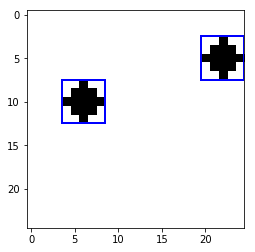

In [11]:
sample = 12


img = read_img('./'+str(sample)+'.png',(25,25,3))



printOutput(img,y[sample],nrows=1,ncols=2,num_classes=2)

[ 3  6  7 14  1  0]
[ 6 12  5  6  1  0]


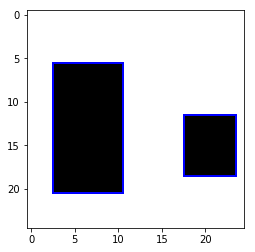

[1, 13, 8, 8, 1, 0, 8, 17, 2, 4, 1, 0]
[1, 13, 8, 8, 1, 0]
[8, 17, 2, 4, 1, 0]


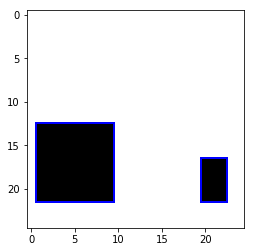

In [205]:
x,y = createImage((25,25,3))


printOutput(x,y,nrows=1,ncols=2,num_classes=2)

[2, 6, 4, 4, 0, 1]
[1, 19, 4, 4, 0, 1]


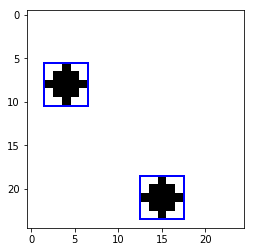

In [168]:
y

[5, 4, 2, 18, 1, 0, 13, 3, 4, 4, 0, 1]

In [ ]:
# data = pd.DataFrame(columns=['key','x1','y1','width1','height1','class1','x2','y2','width2','height2','class2'])

# img_size=(25,25,3)
# size='25x25'

# os.chdir('/home/rsk/Documents/Projects/YOLO/MultiClass/'+size+'/')

# numImg=8000


# for i in range(numImg):
#     key = i
    
#     img,[x1,y1,width1,height1,class1,x2,y2,width2,height2,class2] = createImage(img_size)
# #     img = img.astype(np.uint8)
#     imwrite(str(key)+'.png',img)
    
#     data = data.append({'key':key,'x1':x1,'y1':y1,'width1':width1,'height1':height1,'class1':class1,
#                        'x2':x2-12,'y2':y2,'width2':width2,'height2':height2,'class2':class2}, ignore_index=True)
    

# data.to_csv(size+'_truth.csv',index=False,index_label=False)

    
    
    

In [ ]:
# from matplotlib.patches import Rectangle
# fig,ax = plt.subplots(1)
# ax.imshow(img)

   
# rect1 = Rectangle((y[0][0]-0.5,y[0][1]-0.5),y[0][2]+1, y[0][3]+1,fill=False,edgecolor='blue',
#                      linewidth=2)
# rect2 = Rectangle((y[0][5]+12-0.5,y[0][6]-0.5),y[0][8]+1, y[0][7]+1,fill=False,edgecolor='red',
#                      linewidth=2)

# ax.add_patch(rect1)
# ax.add_patch(rect2)

# plt.show()